In [1]:
# Step 1: Import necessary libraries
import pandas as pd

# Step 2: Load the dataset and treat "Na" as missing values
file_path = r'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Long_Format_Dataset_Updated.csv'
long_df = pd.read_csv(file_path, na_values=['Na'])  

# Step 3: Check for missing data
missing_data_summary = long_df.isnull().sum()

# Step 4: Descriptive statistics for the "value" column 
descriptive_stats = long_df['value'].describe()

# Step 5: Display results
print("Missing Data Summary:")
print(missing_data_summary)

print("\nDescriptive Statistics:")
print(descriptive_stats)


Missing Data Summary:
indicator_name       0
year                 0
value             1038
dtype: int64

Descriptive Statistics:
count     1614.000000
mean       927.698696
std       3096.471717
min          0.000000
25%          4.310025
50%         24.480695
75%         93.715646
max      20149.273440
Name: value, dtype: float64


Missing Value Percentage by Indicator:
                                        indicator_name  missing_percentage
0     Administration of a nationally representative...           61.538462
1     Administration of a nationally representative...           61.538462
2     Administration of a nationally-representative...           61.538462
3     Administration of a nationally-representative...           61.538462
4     Administration of a nationally-representative...           61.538462
..                                                 ...                 ...
97   Proportion of youth and adults who have used c...           84.615385
98   Proportion of youth and adults who have wrote ...           80.769231
99                School enrollment, primary (% gross)            3.846154
100             School enrollment, secondary (% gross)            7.692308
101              School enrollment, tertiary (% gross)            3.846154

[102 rows x 2 columns]


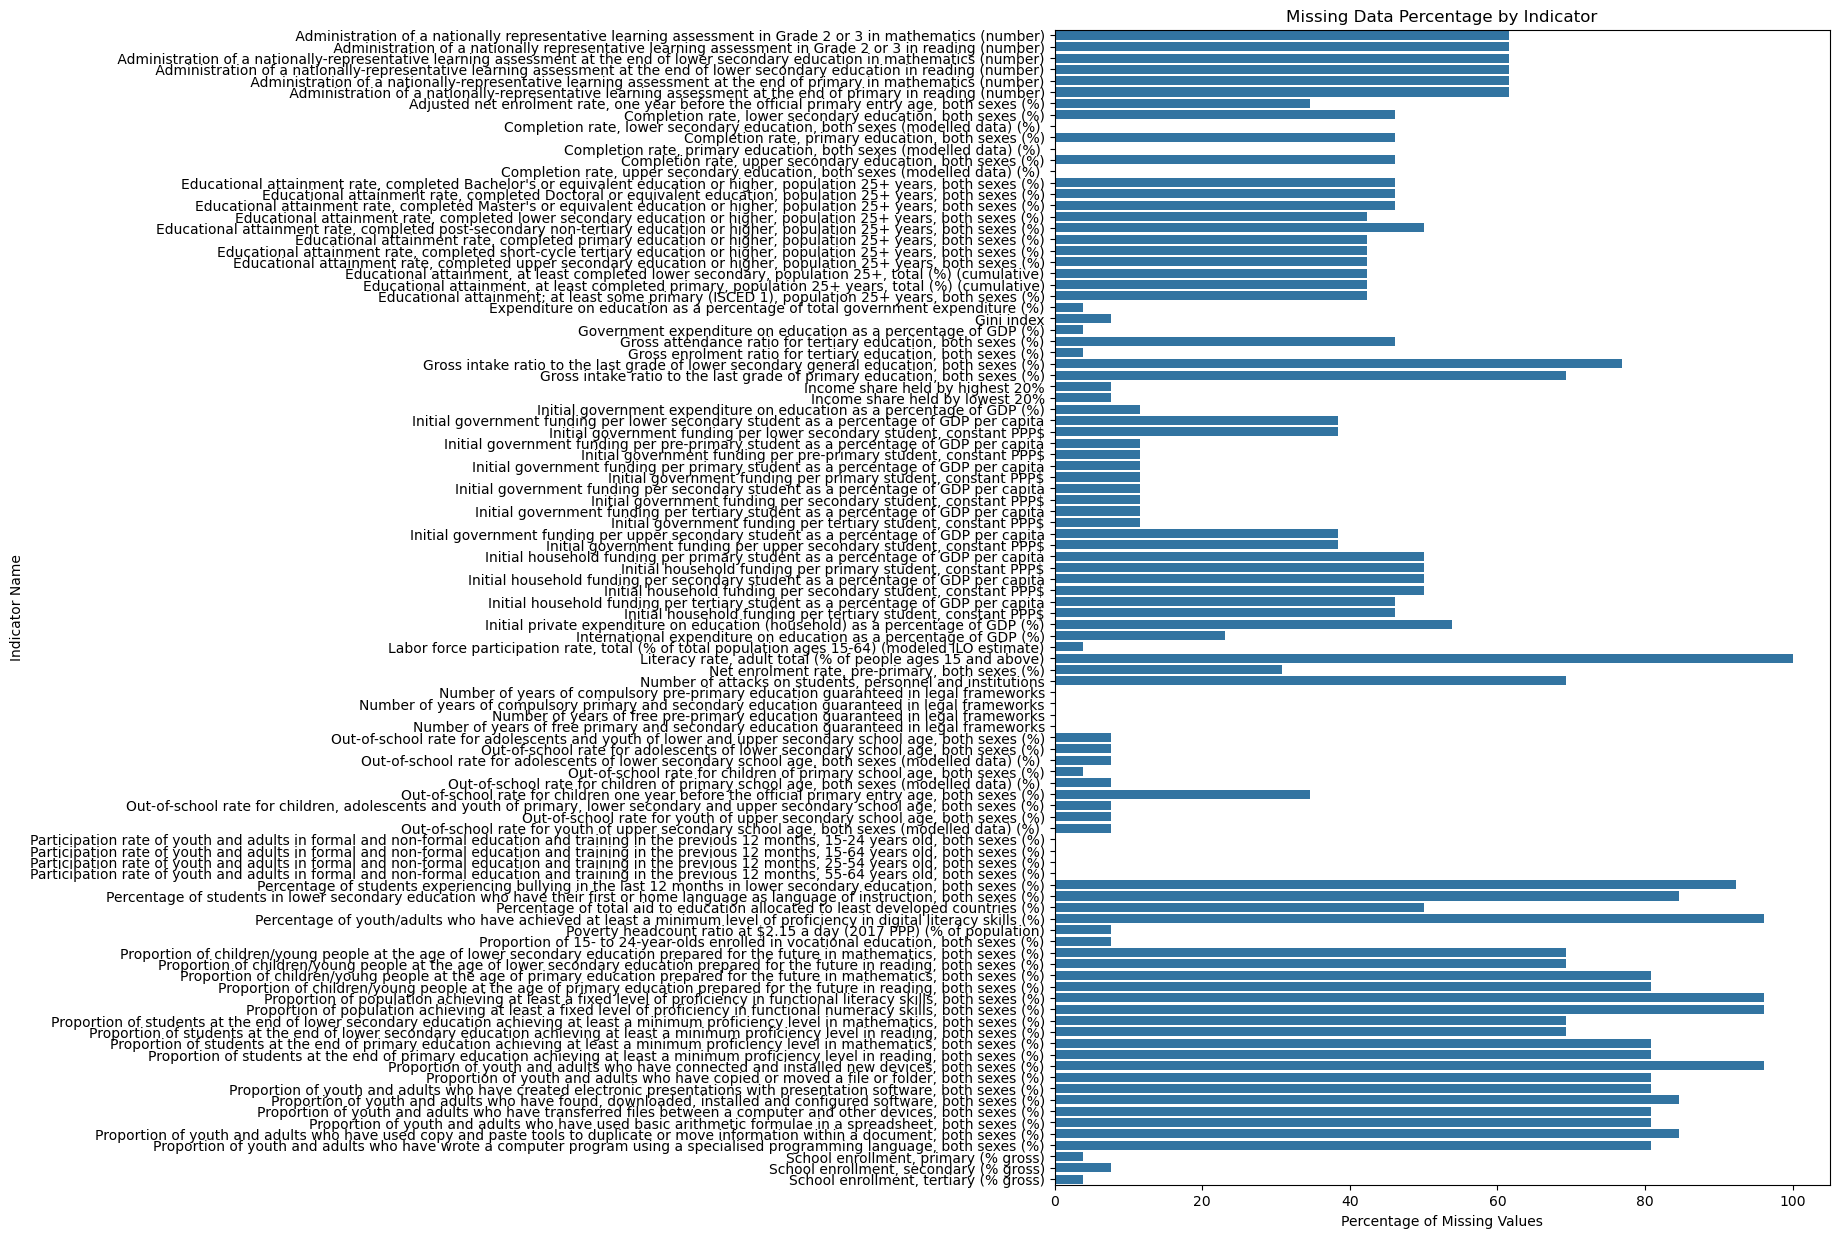

File saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Missing_Values_By_Indicator.csv'


In [2]:
# Step 1: Calculate the percentage of missing values per indicator
missing_by_indicator = (
    long_df.groupby('indicator_name')['value']
    .apply(lambda x: x.isnull().mean() * 100)
    .reset_index(name='missing_percentage')
)

# Step 2: Display indicators with their missing percentages
print("Missing Value Percentage by Indicator:")
print(missing_by_indicator)

# Step 3: Visualize the missing data pattern
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 15))
sns.barplot(data=missing_by_indicator, x='missing_percentage', y='indicator_name', orient='h')
plt.title('Missing Data Percentage by Indicator')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Indicator Name')
plt.show()

# Save the missing value percentages to a CSV file
missing_by_indicator.to_csv('C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Missing_Values_By_Indicator.csv', index=False)
print("File saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Missing_Values_By_Indicator.csv'")



In [ ]:
# Define thresholds for missing data handling
low_threshold = 5
moderate_threshold = 15

# Categorize indicators
low_missing = missing_by_indicator[missing_by_indicator['missing_percentage'] < low_threshold]
moderate_missing = missing_by_indicator[
    (missing_by_indicator['missing_percentage'] >= low_threshold) &
    (missing_by_indicator['missing_percentage'] < moderate_threshold)
]
high_missing = missing_by_indicator[missing_by_indicator['missing_percentage'] >= moderate_threshold]

# Print recommendations
print("Low Missing Indicators (<15%):")
print(low_missing)

print("\nModerate Missing Indicators (15-50%):")
print(moderate_missing)

print("\nHigh Missing Indicators (>50%):")
print(high_missing)

# Save the missing value percentages to a CSV file
low_missing.to_csv('C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/low_missing.csv', index=False)
print("File saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/low_missing.csv'")

moderate_missing.to_csv('C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/moderate_missing.csv', index=False)
print("File saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/moderate_missing.csv'")

high_missing.to_csv('C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/high_missing.csv', index=False)
print("File saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/high_missing.csv'")



Low Missing Indicators (<15%):
                                        indicator_name  missing_percentage
8    Completion rate, lower secondary education, bo...            0.000000
10   Completion rate, primary education, both sexes...            0.000000
12   Completion rate, upper secondary education, bo...            0.000000
24   Expenditure on education as a percentage of to...            3.846154
26   Government expenditure on education as a perce...            3.846154
28   Gross enrolment ratio for tertiary education, ...            3.846154
54   Labor force participation rate, total (% of to...            3.846154
58   Number of years of compulsory pre-primary educ...            0.000000
59   Number of years of compulsory primary and seco...            0.000000
60   Number of years of free pre-primary education ...            0.000000
61   Number of years of free primary and secondary ...            0.000000
65   Out-of-school rate for children of primary sch...            3.8

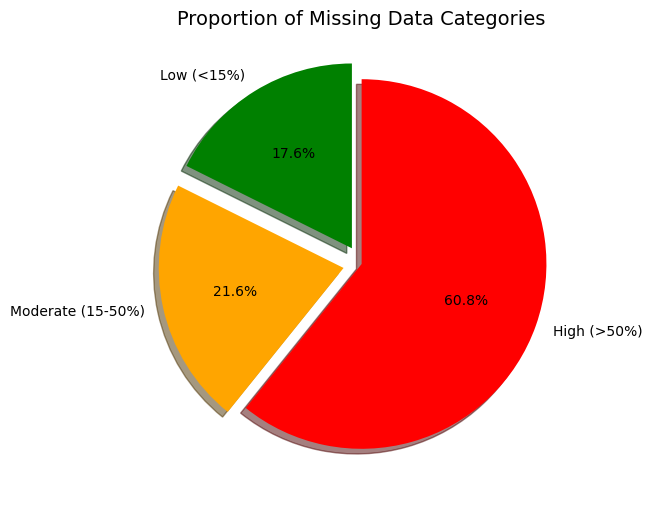

In [4]:
import matplotlib.pyplot as plt

# Data for visualization
labels = ['Low (<15%)', 'Moderate (15-50%)', 'High (>50%)']
sizes = [len(low_missing), len(moderate_missing), len(high_missing)] 
colors = ['green', 'orange', 'red']  

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    sizes, 
    labels=labels, 
    autopct='%1.1f%%',  
    startangle=90,      
    colors=colors, 
    explode=(0.1, 0.1, 0),  
    shadow=True         
)

# Add title
plt.title('Proportion of Missing Data Categories', fontsize=14)
plt.show()


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the datasets
low_missing_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/low_missing.csv'
moderate_missing_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/moderate_missing.csv'
high_missing_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/high_missing.csv'
long_dataset_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Long_Format_Dataset_Updated.csv'

# Read the data
low_missing = pd.read_csv(low_missing_path)
moderate_missing = pd.read_csv(moderate_missing_path)
high_missing = pd.read_csv(high_missing_path)
long_df = pd.read_csv(long_dataset_path)

# Ensure the 'value' column is numeric, converting non-numeric values to NaN
long_df['value'] = pd.to_numeric(long_df['value'], errors='coerce')

# 1. Linear interpolation for low missing indicators (<5%)
low_missing_indicators = low_missing['indicator_name']
for indicator in low_missing_indicators:
    indicator_data = long_df[long_df['indicator_name'] == indicator]
    long_df.loc[long_df['indicator_name'] == indicator, 'value'] = indicator_data['value'].interpolate(method='linear')

# 2. Median imputation for moderate missing indicators (5–50%)
moderate_missing_indicators = moderate_missing['indicator_name']
for indicator in moderate_missing_indicators:
    median_value = long_df[long_df['indicator_name'] == indicator]['value'].median()
    long_df.loc[(long_df['indicator_name'] == indicator) & (long_df['value'].isnull()), 'value'] = median_value

# 3. Dropping high missing indicators (>50%)
high_missing_indicators = high_missing['indicator_name']
long_df = long_df[~long_df['indicator_name'].isin(high_missing_indicators)]

# Save the cleaned dataset
cleaned_dataset_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'
long_df.to_csv(cleaned_dataset_path, index=False)

print("Cleaned dataset saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'.")


Cleaned dataset saved as 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

# Load the cleaned dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'  
cleaned_df = pd.read_csv(file_path)

# Create the specified folder to save the plots
output_folder = "C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/Mini-Project_Progress-and-Challenges-in-Achieving-SDG-Education-Targets-in-the-UK/Indicator_Trends"
os.makedirs(output_folder, exist_ok=True)

# Get the unique indicators
all_indicators = cleaned_df['indicator_name'].unique()

# Function to sanitize filenames
def sanitize_filename(name):
    # Replace invalid characters with underscores
    return re.sub(r'[^\w\-_\. ]', '_', name)

# Generate and save plots for all indicators
for indicator in all_indicators:
    try:
        # Filter data for the indicator
        indicator_data = cleaned_df[cleaned_df['indicator_name'] == indicator]

        # Check if data exists for the indicator
        if indicator_data.empty:
            print(f"No data for indicator: {indicator}")
            continue

        # Create the plot
        plt.figure(figsize=(10, 6))
        plt.plot(indicator_data['year'], indicator_data['value'], marker='o', linestyle='-', label=indicator)
        plt.title(f"Progress Trend: {indicator}")
        plt.xlabel("Year")
        plt.ylabel("Value")
        plt.grid(True)
        plt.legend()

        # Save the plot with sanitized file name
        file_name = sanitize_filename(indicator) + ".png"
        plot_path = os.path.join(output_folder, file_name)

        # Fallback for overly long file paths
        if len(plot_path) > 255:  # Limit for many operating systems
            file_name = f"Indicator_{hash(indicator)}.png"
            plot_path = os.path.join(output_folder, file_name)

        plt.savefig(plot_path)
        plt.close()  # Close the figure to avoid display overload
        print(f"Saved plot: {file_name}")  
    except Exception as e:
        # Log the error and ensure the process continues
        print(f"Error processing indicator: {indicator}. Error: {e}")
        continue

# Print the absolute path of the folder where plots are saved
absolute_folder_path = os.path.abspath(output_folder)
print(f"Plots saved in folder: {absolute_folder_path}")


Saved plot: Indicator_2752461829243630449.png
Saved plot: Indicator_6336080016815431491.png
Saved plot: Indicator_8212983755391119993.png
Saved plot: Indicator_4591359938193143083.png
Saved plot: Indicator_-6895344716815421454.png
Saved plot: Indicator_3920819294828107553.png
Saved plot: Indicator_2343932004029711178.png
Saved plot: Indicator_-6468681155453936564.png
Saved plot: Indicator_2677210871257345607.png
Saved plot: Indicator_4098934926106574953.png
Saved plot: Indicator_-7432839110604879904.png
Saved plot: Indicator_5788434421136559801.png
Saved plot: Indicator_-3687351253323191166.png
Saved plot: Indicator_-1649746168074494773.png
Saved plot: Indicator_1618255976402857312.png
Saved plot: Indicator_-3083664283447008978.png
Saved plot: Indicator_7134428957223502094.png
Saved plot: Indicator_-1979926890154369591.png
Saved plot: Indicator_-5731184449561299368.png
Saved plot: Indicator_2275276086019306657.png
Saved plot: Indicator_1982076014367837452.png
Saved plot: Indicator_-899

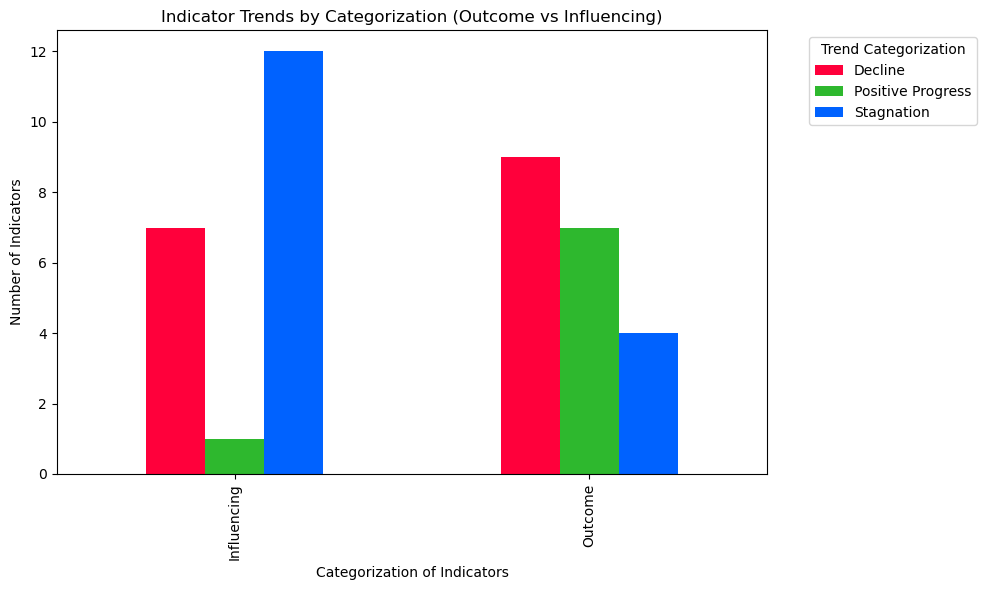

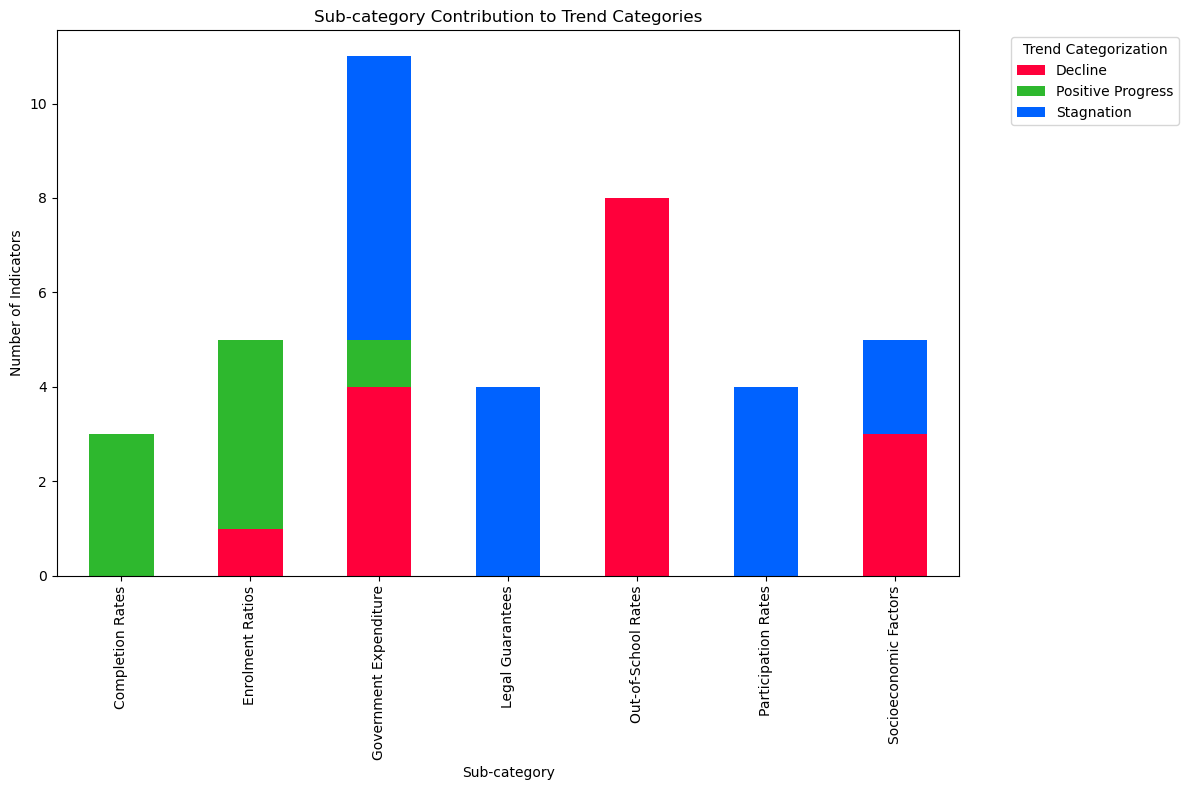

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Data understanding.csv' 
data = pd.read_csv(file_path)

# Group by Categorization and Trend Category to count indicators
trend_summary = data.groupby(['Categorization of Indicators', 'Trend Categorization']).size().unstack(fill_value=0)

# Define custom colors for the trends
colors = {'Positive Progress': '#2EB82E', 'Stagnation': '#0062FF', 'Decline': '#FF003B'}

# Create a bar chart for Outcome vs Influencing grouped by trend categories
ax = trend_summary.plot(kind='bar', stacked=False, figsize=(10, 6), color=[colors[col] for col in trend_summary.columns])
plt.title('Indicator Trends by Categorization (Outcome vs Influencing)')
plt.xlabel('Categorization of Indicators')
plt.ylabel('Number of Indicators')
plt.legend(title='Trend Categorization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group by Sub-category and Trend Category to count indicators
subcategory_summary = data.groupby(['Sub-category', 'Trend Categorization']).size().unstack(fill_value=0)

# Create a stacked bar chart for Sub-category vs Trend Categories
ax = subcategory_summary.plot(kind='bar', stacked=True, figsize=(12, 8), color=[colors[col] for col in subcategory_summary.columns])
plt.title('Sub-category Contribution to Trend Categories')
plt.xlabel('Sub-category')
plt.ylabel('Number of Indicators')
plt.legend(title='Trend Categorization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
## Statistic for Outcome Indicators

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'
df = pd.read_csv(file_path)

# Display dataset preview
print("Dataset Preview:")
print(df.head())

# Display unique indicator names for filtering
print("Unique Indicator Names:")
print(df['indicator_name'].unique())

# Filter indicators containing "enrollment"
enrollment_indicators = df[df['indicator_name'].str.contains('enrollment', case=False, na=False)]

# Compute Descriptive Statistics for "Enrollment" Indicators
if not enrollment_indicators.empty:
    enrollment_stats = enrollment_indicators.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Enrollment Indicators:")
    print(enrollment_stats)

    # Save statistics to a CSV
    enrollment_stats.to_csv('C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Enrollment_Descriptive_Statistics1.csv')
    print("Enrollment statistics saved to file.")
else:
    print("\nNo indicators related to 'enrollment' found in the dataset.")

# Visualize trends for one indicator
indicator_to_plot = 'Gross enrollment ratio for tertiary education, both sexes (%)'  # Example
indicator_data = df[df['indicator_name'] == indicator_to_plot]

if not indicator_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(indicator_data['year'], indicator_data['value'], marker='o', linestyle='-', color='blue')
    plt.title(f'Trend for {indicator_to_plot}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()
else:
    print(f"Indicator '{indicator_to_plot}' not found in the dataset.")

# Save descriptive statistics for enrollment indicators to a CSV file
output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Enrollment_Descriptive_Statistics1.csv'

# Assuming `enrollment_stats` is a DataFrame with descriptive statistics
enrollment_stats.to_csv(output_path)

print(f"Enrollment statistics saved to: {output_path}")



Dataset Preview:
                                      indicator_name  year      value
0  Completion rate, lower secondary education, bo...  1998  99.639999
1  Completion rate, primary education, both sexes...  1998  99.790001
2  Completion rate, upper secondary education, bo...  1998  87.250000
3  Expenditure on education as a percentage of to...  1998  11.488018
4  Government expenditure on education as a perce...  1998   4.207080
Unique Indicator Names:
['Completion rate, lower secondary education, both sexes (modelled data) (%) '
 'Completion rate, primary education, both sexes (modelled data) (%) '
 'Completion rate, upper secondary education, both sexes (modelled data) (%) '
 'Expenditure on education as a percentage of total government expenditure (%)'
 'Government expenditure on education as a percentage of GDP (%)'
 'Gross enrolment ratio for tertiary education, both sexes (%)'
 'Initial government expenditure on education as a percentage of GDP (%)'
 'Initial government fundi

In [10]:
import pandas as pd

# Filter the dataset for specified Enrollment Indicators
enrollment_indicators = [
    'Gross enrolment ratio for tertiary education, both sexes (%)',
    'Proportion of 15- to 24-year-olds enrolled in vocational education, both sexes (%)',
    'School enrollment, primary (% gross)',
    'School enrollment, secondary (% gross)',
    'School enrollment, tertiary (% gross)'
]

# Filter the dataset for the selected indicators
filtered_df = df[df['indicator_name'].isin(enrollment_indicators)]

if not filtered_df.empty:
    # Compute descriptive statistics for enrollment indicators
    enrollment_stats = filtered_df.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Enrollment Indicators:")
    print(enrollment_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Enrollment_Descriptive_Statistics.csv'
    enrollment_stats.to_csv(output_path)
    print(f"Enrollment statistics saved to: {output_path}")
else:
    print("No enrollment indicators found in the dataset.")



Descriptive Statistics for Enrollment Indicators:
                                                    count        mean  \
indicator_name                                                          
Gross enrolment ratio for tertiary education, b...   26.0   61.798682   
Proportion of 15- to 24-year-olds enrolled in v...   26.0   14.243791   
School enrollment, primary (% gross)                 26.0  102.652705   
School enrollment, secondary (% gross)               26.0  107.435455   
School enrollment, tertiary (% gross)                26.0   61.798682   

                                                          std        min  \
indicator_name                                                             
Gross enrolment ratio for tertiary education, b...   6.984691  56.397129   
Proportion of 15- to 24-year-olds enrolled in v...   4.097773   5.472360   
School enrollment, primary (% gross)                 2.231890  99.974503   
School enrollment, secondary (% gross)              10.76

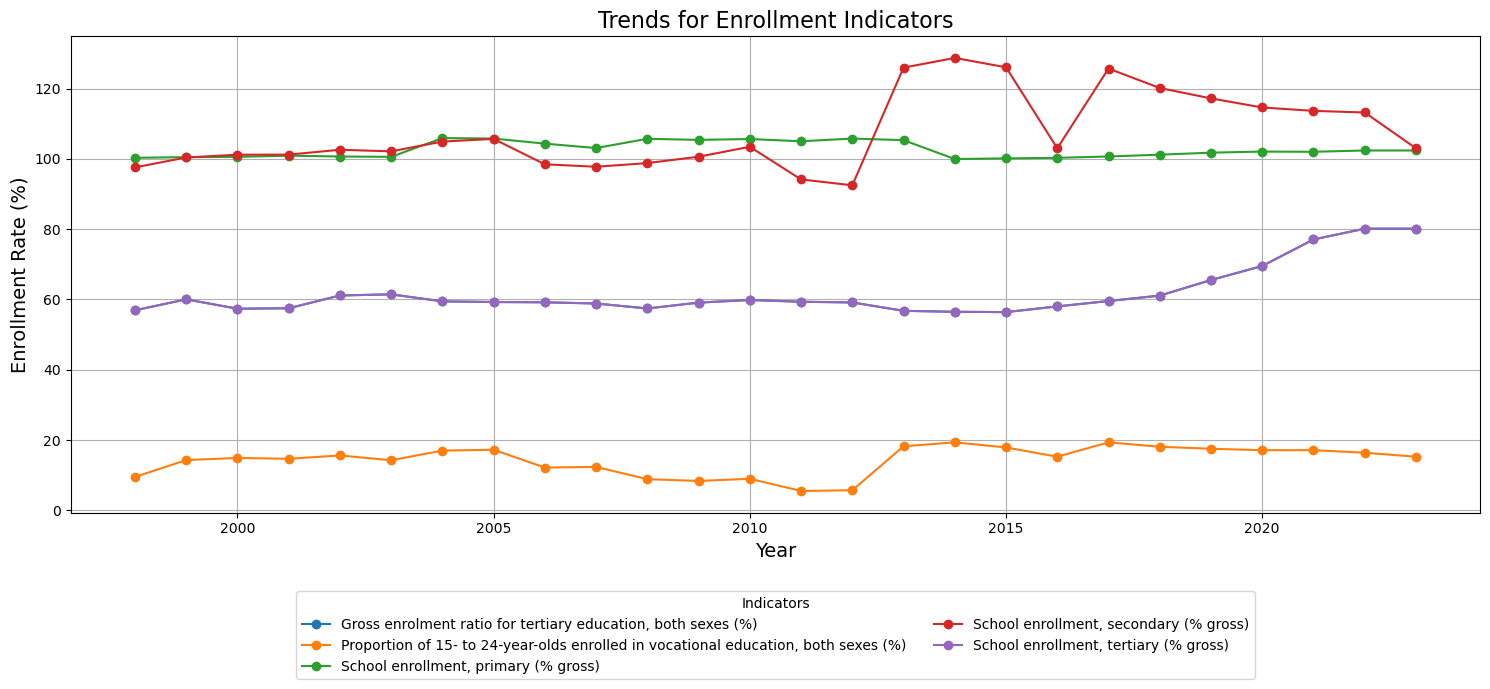

In [11]:
import matplotlib.pyplot as plt

if not filtered_df.empty:
    # Group data by indicator names
    grouped_data = filtered_df.groupby('indicator_name')
    
    # Adjust the figure size for wider x-axis
    plt.figure(figsize=(15, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Enrollment Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Enrollment Rate (%)', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1]) 
    plt.show()
else:
    print("No enrollment indicators found in the dataset.")


In [12]:
# Filter indicators related to "Completion Rates"
completion_cols = df[df['indicator_name'].str.contains('completion rate', case=False, na=False)]

if not completion_cols.empty:
    # Compute descriptive statistics for completion rates
    completion_stats = completion_cols.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Completion Rates:")
    print(completion_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Completion_Descriptive_Statistics.csv'
    completion_stats.to_csv(output_path)
    print(f"Completion statistics saved to: {output_path}")
else:
    print("No completion rate indicators found in the dataset.")


# Visualize "Completion rate, primary education, both sexes (%)"
indicator_to_plot = 'Completion rate, primary education, both sexes (%)'
completion_data = df[df['indicator_name'] == indicator_to_plot]

if not completion_data.empty:
    plt.figure(figsize=(10, 6))
    plt.plot(completion_data['year'], completion_data['value'], marker='o', linestyle='-', color='green')
    plt.title(f'Trend for {indicator_to_plot}')
    plt.xlabel('Year')
    plt.ylabel('Completion Rate (%)')
    plt.grid(True)
    plt.show()
else:
    print(f"Indicator '{indicator_to_plot}' not found in the dataset.")



Descriptive Statistics for Completion Rates:
                                                    count       mean  \
indicator_name                                                         
Completion rate, lower secondary education, bot...   26.0  99.705000   
Completion rate, primary education, both sexes ...   26.0  99.817308   
Completion rate, upper secondary education, bot...   26.0  88.124616   

                                                         std        min  \
indicator_name                                                            
Completion rate, lower secondary education, bot...  0.079812  99.639999   
Completion rate, primary education, both sexes ...  0.032564  99.790001   
Completion rate, upper secondary education, bot...  0.811153  87.250000   

                                                          25%        50%  \
indicator_name                                                             
Completion rate, lower secondary education, bot...  99.642500  99

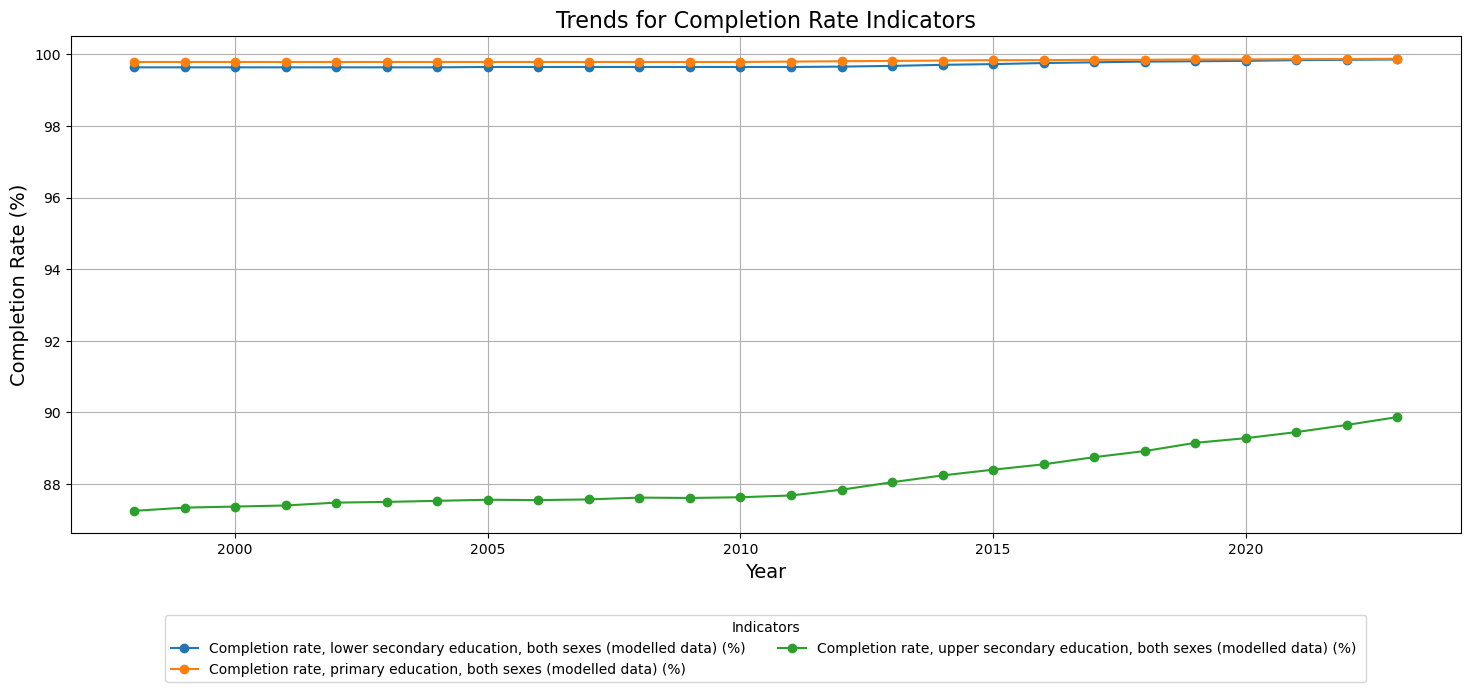

In [13]:
import matplotlib.pyplot as plt

# Filter indicators related to "Completion Rate"
completion_cols = df[df['indicator_name'].str.contains('completion rate', case=False, na=False)]

if not completion_cols.empty:
    # Group data by indicator names
    grouped_data = completion_cols.groupby('indicator_name')
    
    # Adjust the figure size to make the x-axis wider
    plt.figure(figsize=(15, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Completion Rate Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Completion Rate (%)', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.show()
else:
    print("No completion rate indicators found in the dataset.")


In [14]:
# Filter indicators related to "Out-of-School Rates"
out_of_school_cols = df[df['indicator_name'].str.contains('out-of-school rate', case=False, na=False)]

if not out_of_school_cols.empty:
    # Compute descriptive statistics for out-of-school rates
    out_of_school_stats = out_of_school_cols.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Out-of-School Rates:")
    print(out_of_school_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Out_of_School_Descriptive_Statistics.csv'
    out_of_school_stats.to_csv(output_path)
    print(f"Out-of-School Rates statistics saved to: {output_path}")
else:
    print("No out-of-school rate indicators found in the dataset.")






Descriptive Statistics for Out-of-School Rates:
                                                    count      mean       std  \
indicator_name                                                                  
Out-of-school rate for adolescents and youth of...   26.0  4.039692  1.786535   
Out-of-school rate for adolescents of lower sec...   26.0  1.232392  1.064143   
Out-of-school rate for adolescents of lower sec...   26.0  0.423077  0.503831   
Out-of-school rate for children of primary scho...   26.0  0.658760  0.729376   
Out-of-school rate for children of primary scho...   26.0  1.538462  0.947872   
Out-of-school rate for children, adolescents an...   26.0  2.490635  1.032451   
Out-of-school rate for youth of upper secondary...   26.0  6.197867  2.883245   
Out-of-school rate for youth of upper secondary...   26.0  6.692308  3.256000   

                                                        min       25%  \
indicator_name                                                     

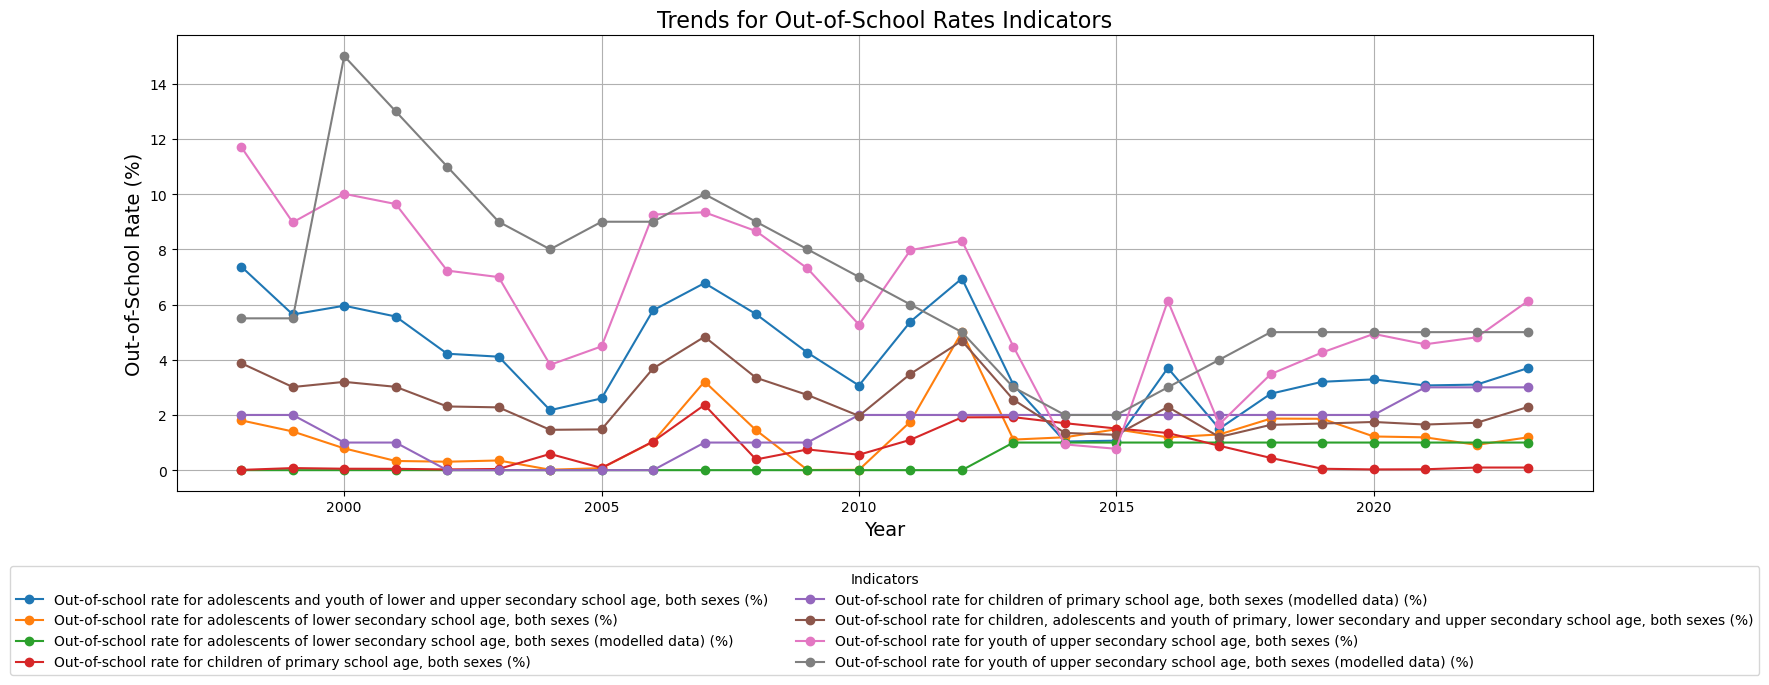

In [15]:
import matplotlib.pyplot as plt

# Filter indicators related to "Out-of-School Rates"
out_of_school_cols = df[df['indicator_name'].str.contains('out-of-school rate', case=False, na=False)]

if not out_of_school_cols.empty:
    # Group data by indicator names
    grouped_data = out_of_school_cols.groupby('indicator_name')
    
    # Adjust the figure size to make the x-axis wider
    plt.figure(figsize=(18, 8))  
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Out-of-School Rates Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Out-of-School Rate (%)', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])  
    plt.show()
else:
    print("No out-of-school rate indicators found in the dataset.")


In [16]:
import pandas as pd

# Filter the dataset for specified Participation Rate Indicators
participation_indicators = [
    'Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-24 years old, both sexes (%)',
    'Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-64 years old, both sexes (%)',
    'Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 25-54 years old, both sexes (%)',
    'Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 55-64 years old, both sexes (%)'
]

# Filter the dataset for the selected indicators
filtered_df = df[df['indicator_name'].isin(participation_indicators)]

if not filtered_df.empty:
    # Compute descriptive statistics for participation rate indicators
    participation_stats = filtered_df.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Participation Rate Indicators:")
    print(participation_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Participation_Descriptive_Statistics.csv'
    participation_stats.to_csv(output_path)
    print(f"Participation Rate statistics saved to: {output_path}")
else:
    print("No participation rate indicators found in the dataset.")



Descriptive Statistics for Participation Rate Indicators:
                                                    count       mean  \
indicator_name                                                         
Participation rate of youth and adults in forma...   26.0  54.126154   
Participation rate of youth and adults in forma...   26.0  20.736538   
Participation rate of youth and adults in forma...   26.0  14.729115   
Participation rate of youth and adults in forma...   26.0   7.253577   

                                                         std     min      25%  \
indicator_name                                                                  
Participation rate of youth and adults in forma...  8.062133  40.100  50.3525   
Participation rate of youth and adults in forma...  6.276944  12.350  14.0250   
Participation rate of youth and adults in forma...  6.220465   6.355   8.9000   
Participation rate of youth and adults in forma...  4.447025   1.500   2.2500   

                     

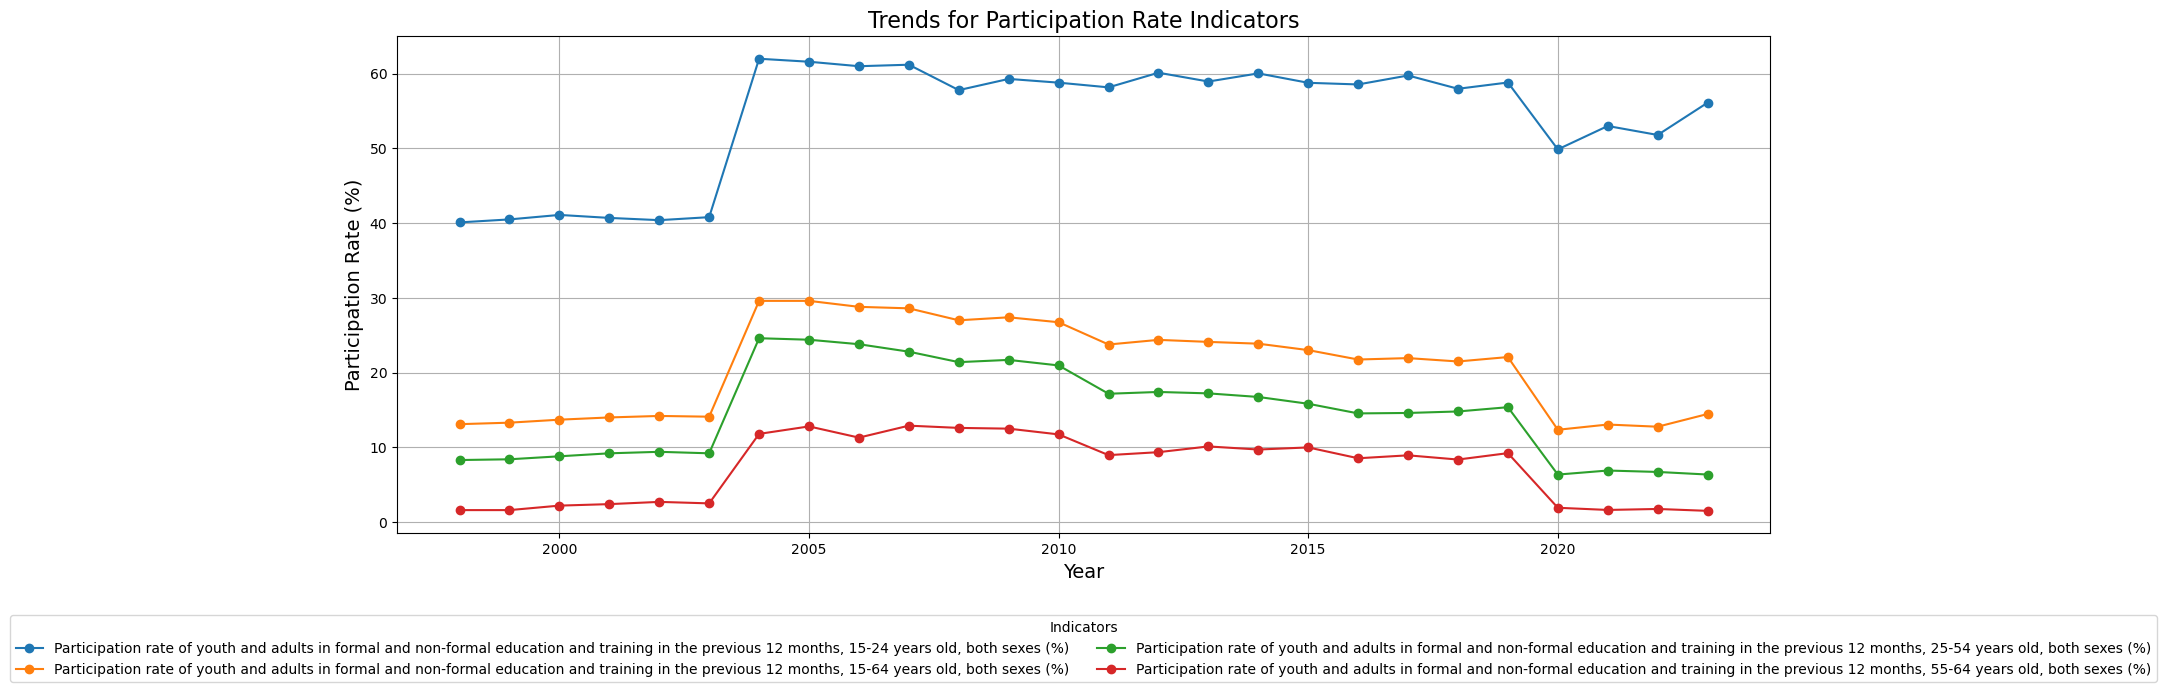

In [17]:
import matplotlib.pyplot as plt

if not filtered_df.empty:
    # Group data by indicator names
    grouped_data = filtered_df.groupby('indicator_name')
    
    # Adjust the figure size for wider x-axis
    plt.figure(figsize=(20, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Participation Rate Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Participation Rate (%)', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])
    plt.show()
else:
    print("No participation rate indicators found in the dataset.")


In [18]:
## Statistic for Influencing Factor

In [19]:
import pandas as pd

# Filter the dataset for specified Government Expenditure Indicators
expenditure_indicators = [
    'Expenditure on education as a percentage of total government expenditure (%)',
    'Government expenditure on education as a percentage of GDP (%)',
    'Initial government expenditure on education as a percentage of GDP (%)',
    'Initial government funding per pre-primary student as a percentage of GDP per capita',
    'Initial government funding per pre-primary student, constant PPP$',
    'Initial government funding per primary student as a percentage of GDP per capita',
    'Initial government funding per primary student, constant PPP$',
    'Initial government funding per secondary student as a percentage of GDP per capita',
    'Initial government funding per secondary student, constant PPP$',
    'Initial government funding per tertiary student as a percentage of GDP per capita',
    'Initial government funding per tertiary student, constant PPP$'
]

# Filter the dataset for the selected indicators
filtered_df = df[df['indicator_name'].isin(expenditure_indicators)]

if not filtered_df.empty:
    # Compute descriptive statistics for government expenditure indicators
    expenditure_stats = filtered_df.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Government Expenditure Indicators:")
    print(expenditure_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Government_Expenditure_Descriptive_Statistics.csv'
    expenditure_stats.to_csv(output_path)
    print(f"Government Expenditure statistics saved to: {output_path}")
else:
    print("No government expenditure indicators found in the dataset.")



Descriptive Statistics for Government Expenditure Indicators:
                                                    count          mean  \
indicator_name                                                            
Expenditure on education as a percentage of tot...   26.0     12.581719   
Government expenditure on education as a percen...   26.0      5.054038   
Initial government expenditure on education as ...   26.0      5.033674   
Initial government funding per pre-primary stud...   26.0     14.687809   
Initial government funding per pre-primary stud...   26.0   6967.519024   
Initial government funding per primary student ...   26.0     20.185869   
Initial government funding per primary student,...   26.0   9896.457294   
Initial government funding per secondary studen...   26.0     23.703487   
Initial government funding per secondary studen...   26.0  11456.935847   
Initial government funding per tertiary student...   26.0     29.293582   
Initial government funding per tertia

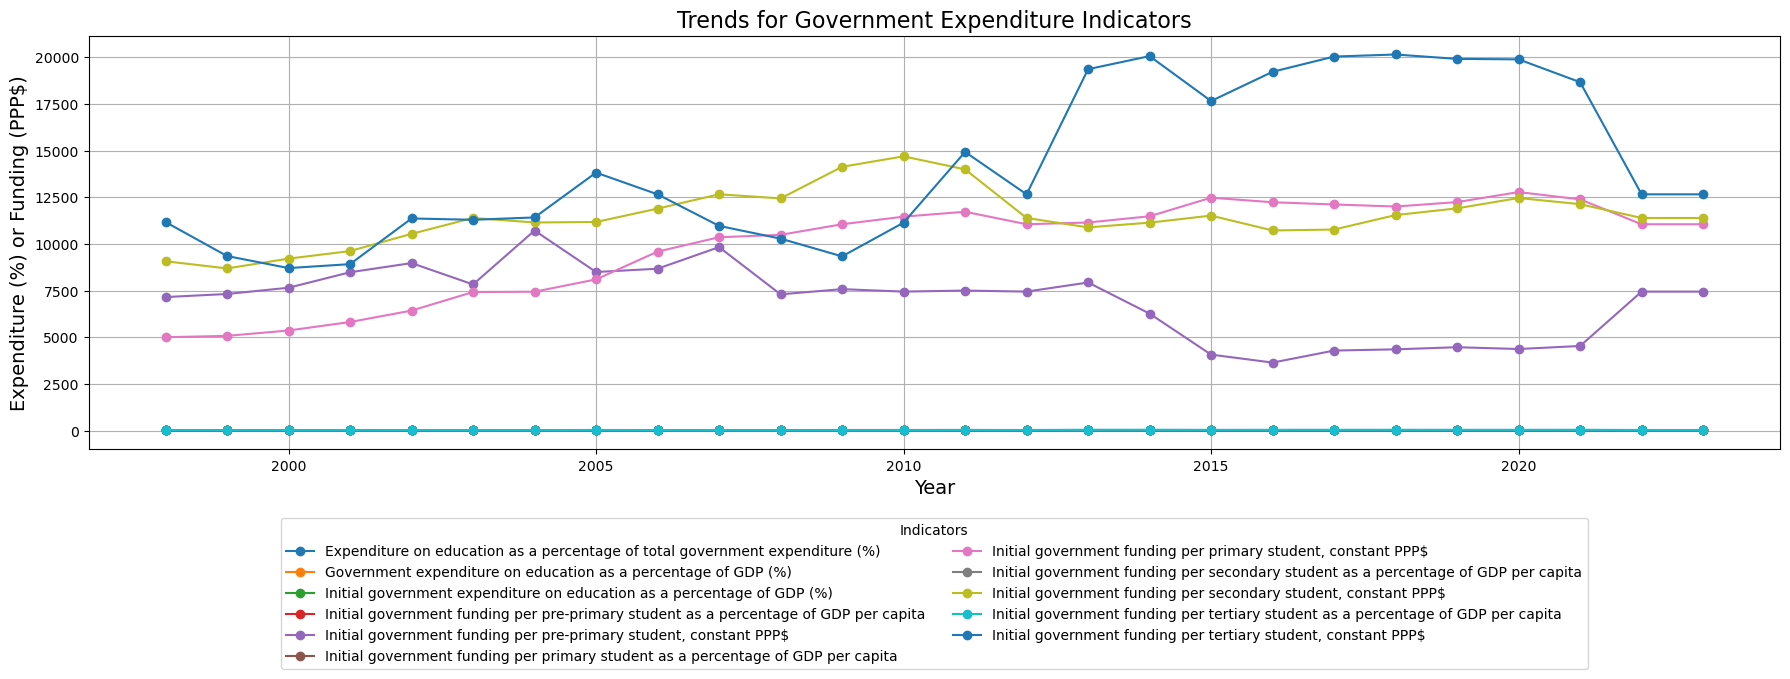

In [20]:
import matplotlib.pyplot as plt

if not filtered_df.empty:
    # Group data by indicator names
    grouped_data = filtered_df.groupby('indicator_name')
    
    # Adjust the figure size for wider x-axis
    plt.figure(figsize=(18, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Government Expenditure Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Expenditure (%) or Funding (PPP$)', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])  
    plt.show()
else:
    print("No government expenditure indicators found in the dataset.")


In [21]:
## Note
import pandas as pd

# Filter the dataset for specified Government Expenditure Indicators
expenditure_indicators = [
    'Expenditure on education as a percentage of total government expenditure (%)',
    'Government expenditure on education as a percentage of GDP (%)',
    'Initial government expenditure on education as a percentage of GDP (%)',
    'Initial government funding per pre-primary student as a percentage of GDP per capita',
    'Initial government funding per primary student as a percentage of GDP per capita',
    'Initial government funding per secondary student as a percentage of GDP per capita',
    'Initial government funding per tertiary student as a percentage of GDP per capita'
]

# Filter the dataset for the selected indicators
filtered_df = df[df['indicator_name'].isin(expenditure_indicators)]

if not filtered_df.empty:
    # Compute descriptive statistics for government expenditure indicators
    expenditure_stats = filtered_df.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Government Expenditure Indicators:")
    print(expenditure_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Government_Expenditure_Descriptive_Statistics2.csv'
    expenditure_stats.to_csv(output_path)
    print(f"Government Expenditure statistics saved to: {output_path}")
else:
    print("No government expenditure indicators found in the dataset.")



Descriptive Statistics for Government Expenditure Indicators:
                                                    count       mean  \
indicator_name                                                         
Expenditure on education as a percentage of tot...   26.0  12.581719   
Government expenditure on education as a percen...   26.0   5.054038   
Initial government expenditure on education as ...   26.0   5.033674   
Initial government funding per pre-primary stud...   26.0  14.687809   
Initial government funding per primary student ...   26.0  20.185869   
Initial government funding per secondary studen...   26.0  23.703487   
Initial government funding per tertiary student...   26.0  29.293582   

                                                         std        min  \
indicator_name                                                            
Expenditure on education as a percentage of tot...  1.146709  10.440753   
Government expenditure on education as a percen...  0.538190   

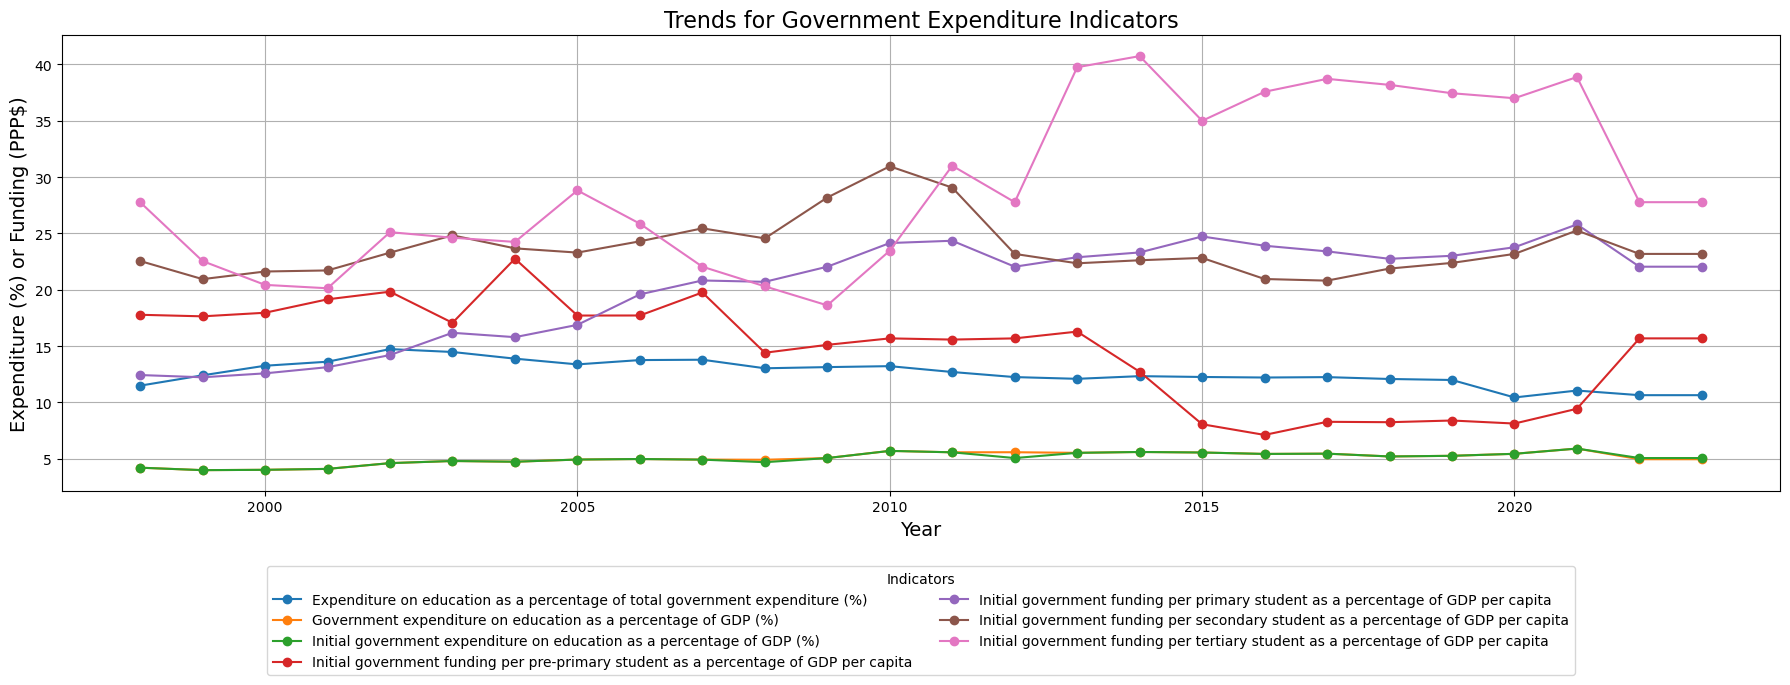

In [22]:
import matplotlib.pyplot as plt

if not filtered_df.empty:
    # Group data by indicator names
    grouped_data = filtered_df.groupby('indicator_name')
    
    # Adjust the figure size for wider x-axis
    plt.figure(figsize=(18, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Government Expenditure Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Expenditure (%) or Funding (PPP$)', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])  
    plt.show()
else:
    print("No government expenditure indicators found in the dataset.")


In [23]:
import pandas as pd

# Filter the dataset for specified Legal Guarantees Indicators
legal_guarantees_indicators = [
    'Number of years of compulsory pre-primary education guaranteed in legal frameworks',
    'Number of years of compulsory primary and secondary education guaranteed in legal frameworks',
    'Number of years of free pre-primary education guaranteed in legal frameworks',
    'Number of years of free primary and secondary education guaranteed in legal frameworks'
]

# Filter the dataset for the selected indicators
filtered_df = df[df['indicator_name'].isin(legal_guarantees_indicators)]

if not filtered_df.empty:
    # Compute descriptive statistics for legal guarantees indicators
    legal_guarantees_stats = filtered_df.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Legal Guarantees Indicators:")
    print(legal_guarantees_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Legal_Guarantees_Descriptive_Statistics.csv'
    legal_guarantees_stats.to_csv(output_path)
    print(f"Legal Guarantees statistics saved to: {output_path}")
else:
    print("No legal guarantees indicators found in the dataset.")



Descriptive Statistics for Legal Guarantees Indicators:
                                                    count  mean  std   min  \
indicator_name                                                               
Number of years of compulsory pre-primary educa...   26.0   0.0  0.0   0.0   
Number of years of compulsory primary and secon...   26.0  11.0  0.0  11.0   
Number of years of free pre-primary education g...   26.0   2.0  0.0   2.0   
Number of years of free primary and secondary e...   26.0  13.0  0.0  13.0   

                                                     25%   50%   75%   max  
indicator_name                                                              
Number of years of compulsory pre-primary educa...   0.0   0.0   0.0   0.0  
Number of years of compulsory primary and secon...  11.0  11.0  11.0  11.0  
Number of years of free pre-primary education g...   2.0   2.0   2.0   2.0  
Number of years of free primary and secondary e...  13.0  13.0  13.0  13.0  
Legal Guaran

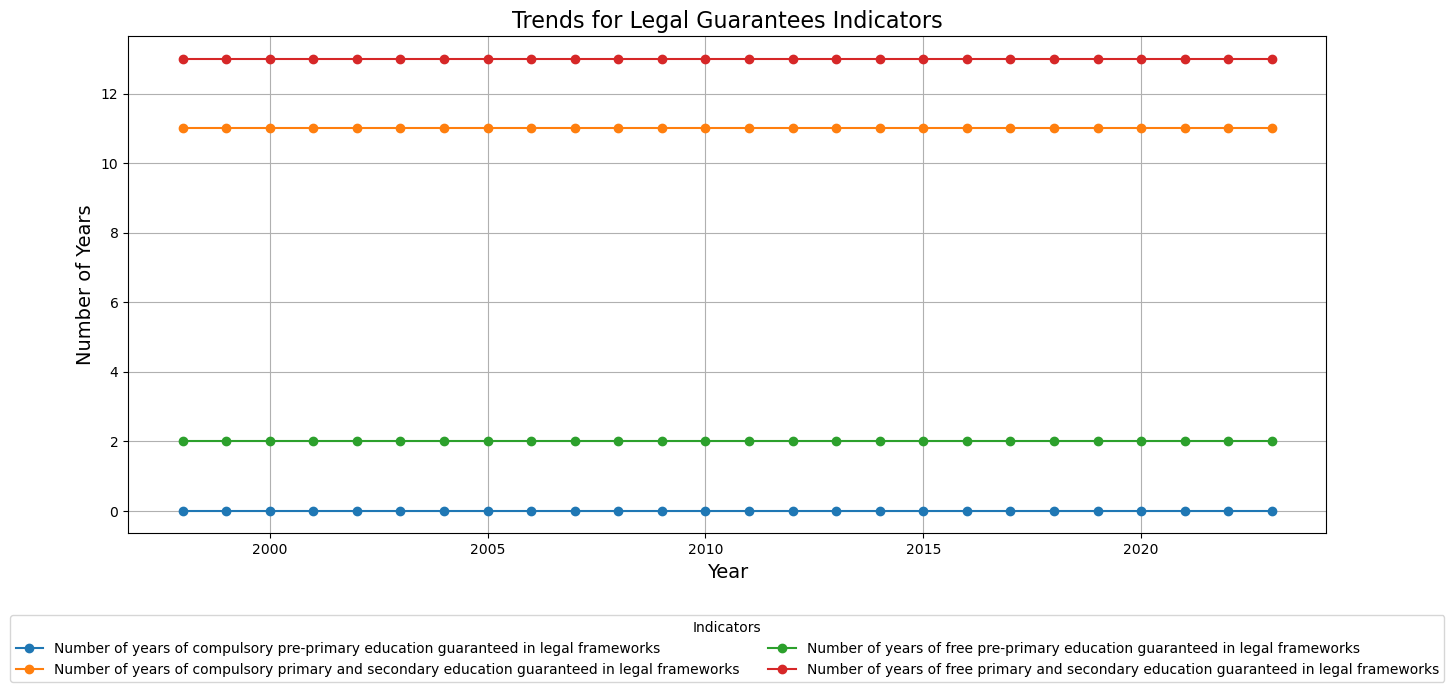

In [24]:
import matplotlib.pyplot as plt

if not filtered_df.empty:
    # Group data by indicator names
    grouped_data = filtered_df.groupby('indicator_name')
    
    # Adjust the figure size for wider x-axis
    plt.figure(figsize=(15, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Legal Guarantees Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Number of Years', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1])  
    plt.show()
else:
    print("No legal guarantees indicators found in the dataset.")


In [25]:
import pandas as pd

# Filter the dataset for specified Socioeconomic Factors Indicators
socioeconomic_indicators = [
    'Gini index',
    'Income share held by highest 20%',
    'Income share held by lowest 20%',
    'Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)',
    'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
]

# Filter the dataset for the selected indicators
filtered_df = df[df['indicator_name'].isin(socioeconomic_indicators)]

if not filtered_df.empty:
    # Compute descriptive statistics for socioeconomic factors indicators
    socioeconomic_stats = filtered_df.groupby('indicator_name')['value'].describe()
    print("\nDescriptive Statistics for Socioeconomic Factors Indicators:")
    print(socioeconomic_stats)

    # Save the statistics to a CSV
    output_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Socioeconomic_Descriptive_Statistics.csv'
    socioeconomic_stats.to_csv(output_path)
    print(f"Socioeconomic Factors statistics saved to: {output_path}")
else:
    print("No socioeconomic factors indicators found in the dataset.")



Descriptive Statistics for Socioeconomic Factors Indicators:
                                                    count       mean  \
indicator_name                                                         
Gini index                                           26.0  34.415385   
Income share held by highest 20%                     26.0  41.588462   
Income share held by lowest 20%                      26.0   7.403846   
Labor force participation rate, total (% of tot...   26.0  76.448038   
Poverty headcount ratio at $2.15 a day (2017 PP...   26.0   0.234615   

                                                         std     min     25%  \
indicator_name                                                                 
Gini index                                          1.648864  32.400  33.100   
Income share held by highest 20%                    1.468898  39.700  40.500   
Income share held by lowest 20%                     0.279257   6.800   7.225   
Labor force participation rate, t

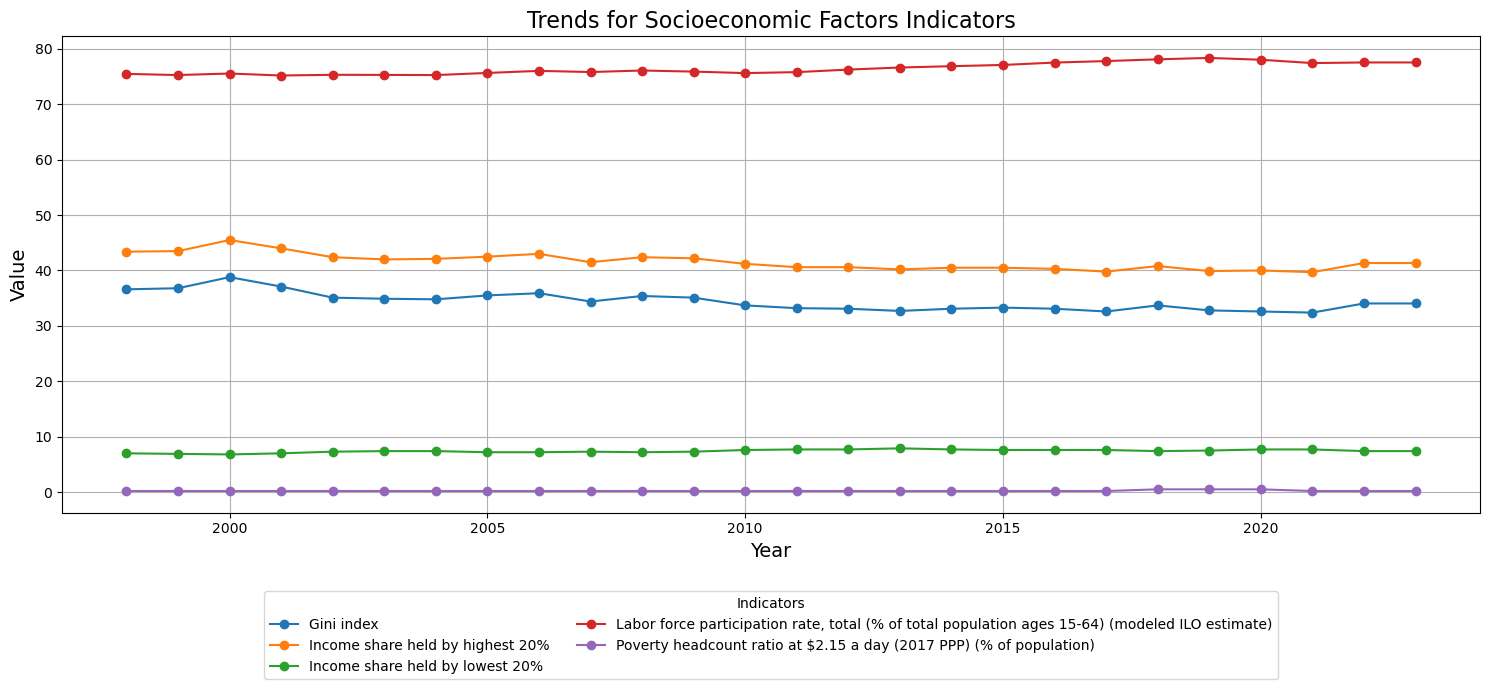

In [26]:
import matplotlib.pyplot as plt

if not filtered_df.empty:
    # Group data by indicator names
    grouped_data = filtered_df.groupby('indicator_name')
    
    # Adjust the figure size for wider x-axis
    plt.figure(figsize=(15, 8))
    
    # Plot each indicator's trend
    for indicator_name, group in grouped_data:
        plt.plot(group['year'], group['value'], marker='o', label=indicator_name)
    
    # Customize the plot
    plt.title('Trends for Socioeconomic Factors Indicators', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(True)
    
    # Place legend at the bottom
    plt.legend(title='Indicators', fontsize=10, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    
    # Adjust layout
    plt.tight_layout(rect=[0, 0.1, 1, 1]) 
    plt.show()
else:
    print("No socioeconomic factors indicators found in the dataset.")


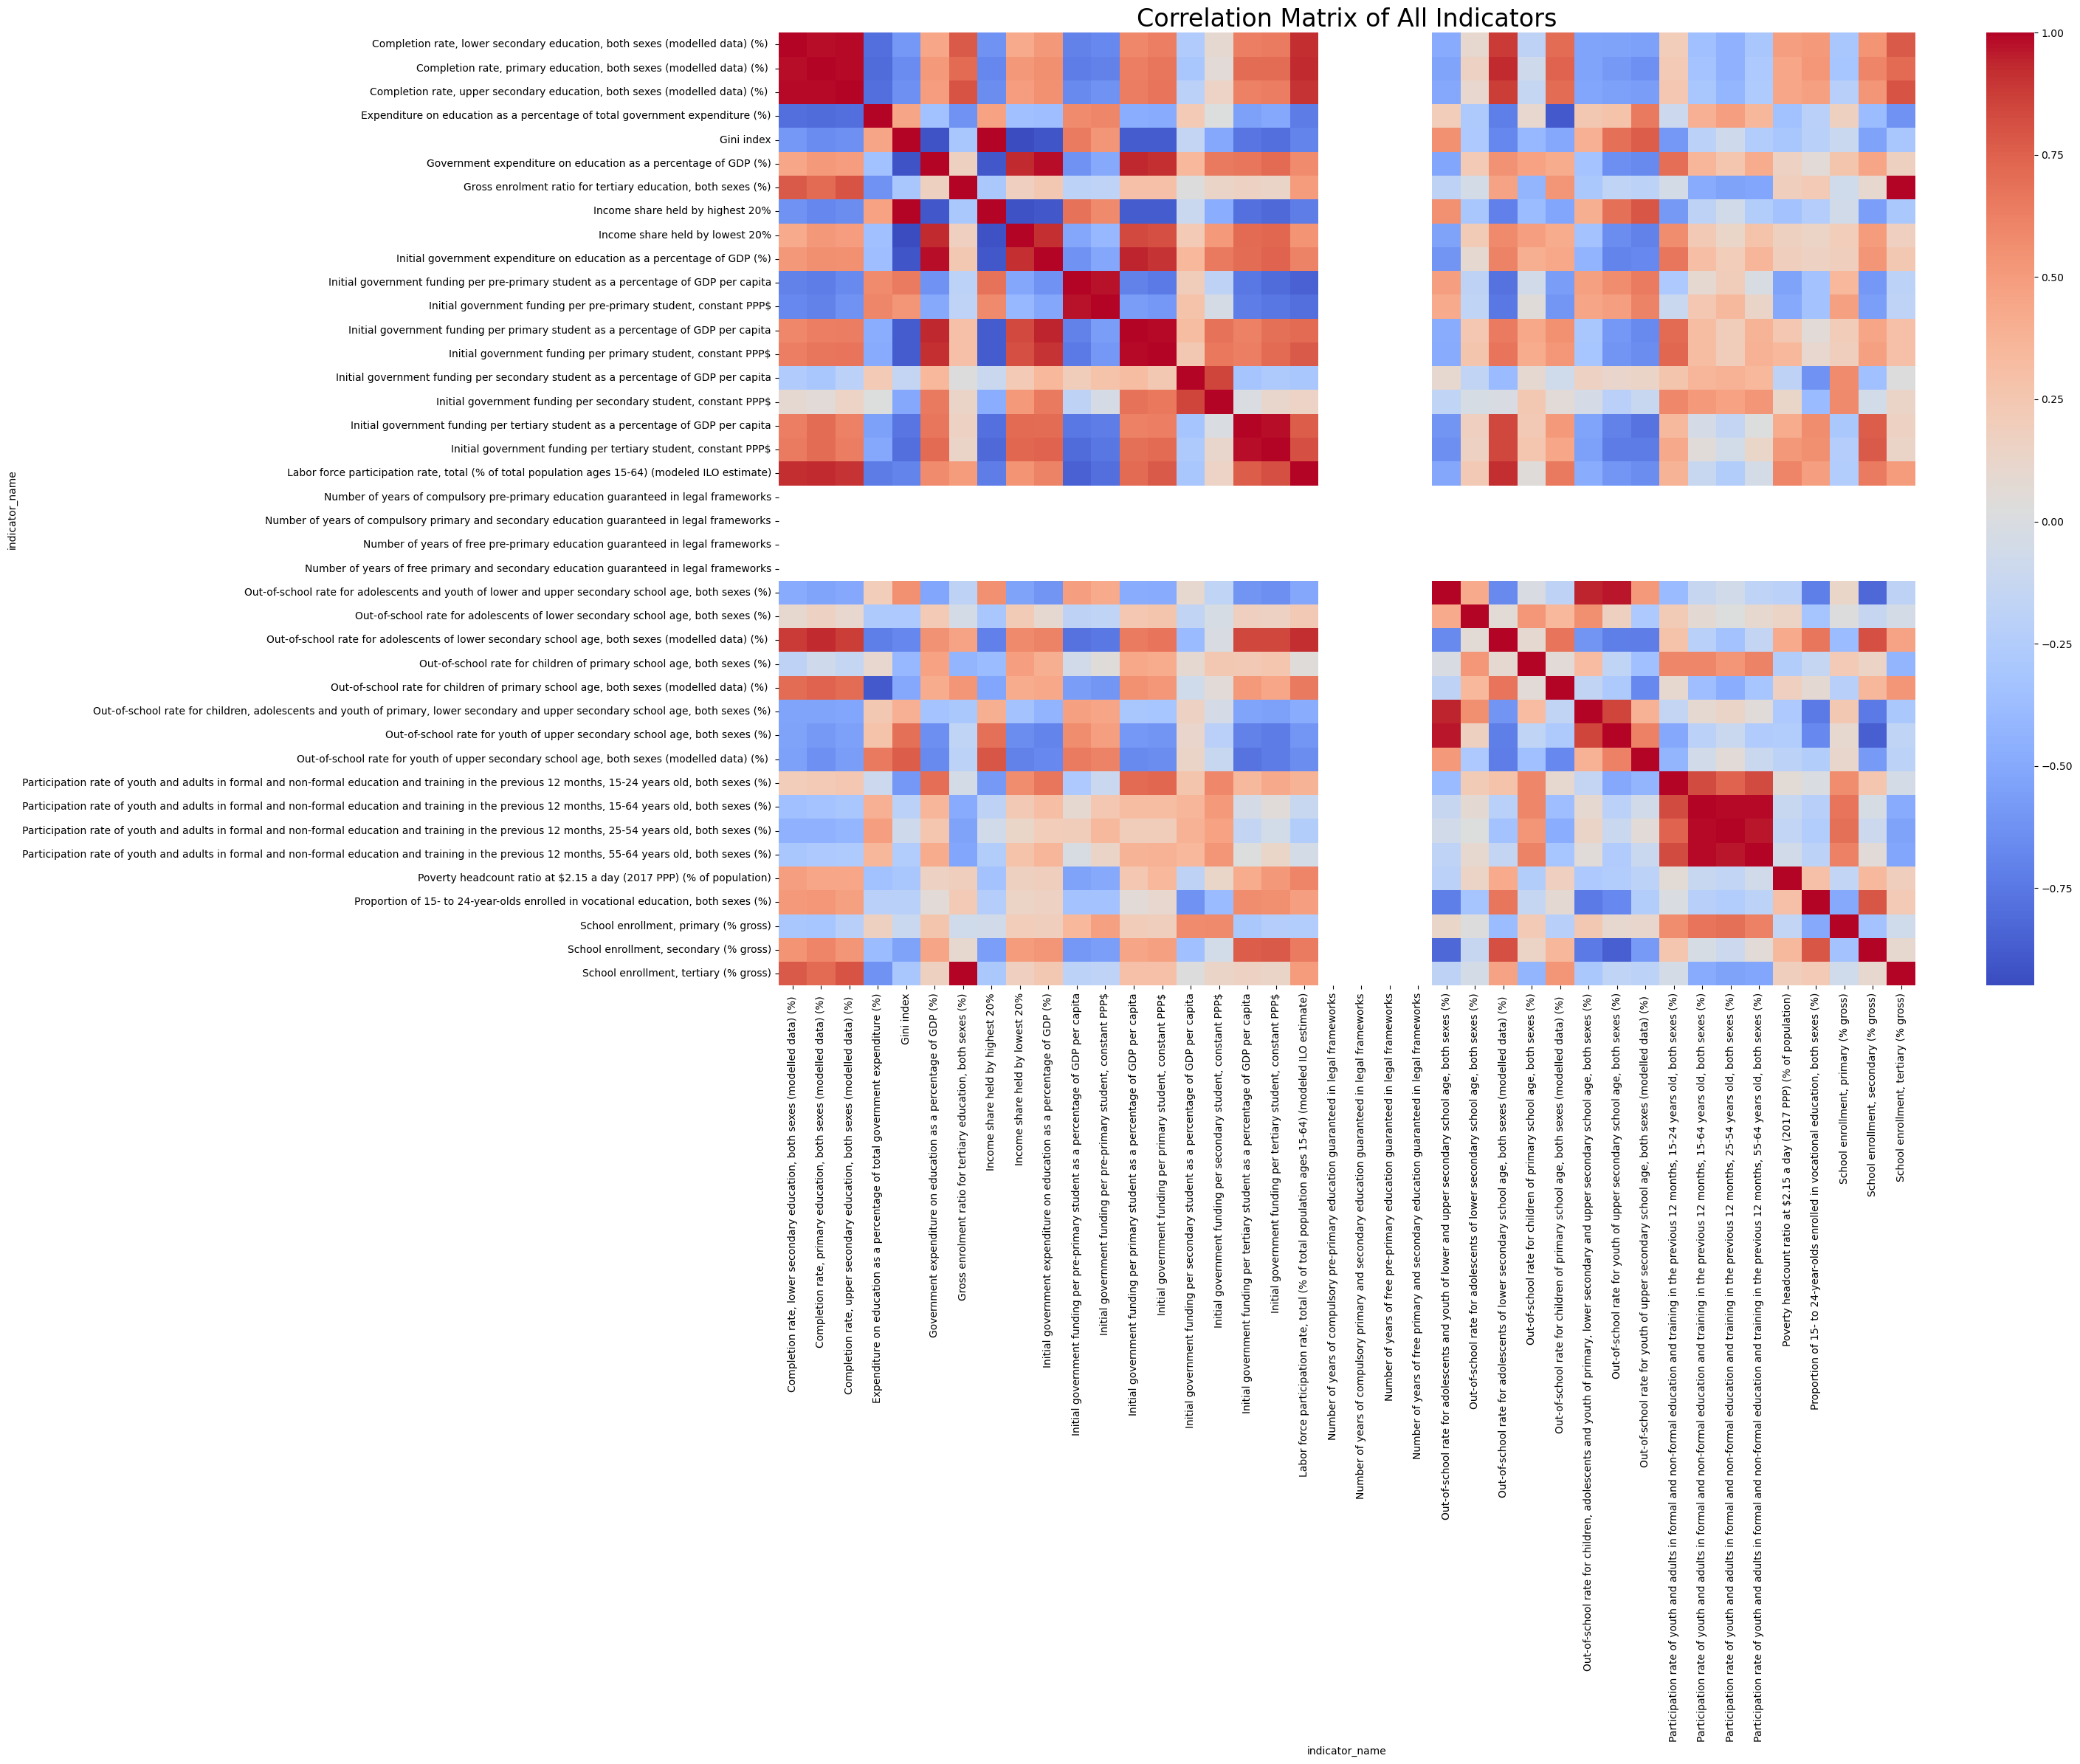

Strong Correlations:
indicator_name                                      Completion rate, lower secondary education, both sexes (modelled data) (%)   \
indicator_name                                                                                                                    
Completion rate, lower secondary education, bot...                                           1.000000                             
Completion rate, primary education, both sexes ...                                           0.984204                             
Completion rate, upper secondary education, bot...                                           0.991783                             
Expenditure on education as a percentage of tot...                                          -0.795077                             
Gini index                                                                                        NaN                             
Government expenditure on education as a percen...            

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv' 
data = pd.read_csv(file_path)

# Pivot the data for correlation analysis (rows: year, columns: indicators)
correlation_data = data.pivot(index='year', columns='indicator_name', values='value')

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(30, 24))  
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", cbar=True)
plt.title('Correlation Matrix of All Indicators', fontsize=24)  
plt.tight_layout()

# Display the heatmap
plt.show()

# Step 5: Insights from Correlation Analysis
# Identify strong positive or negative correlations (e.g., threshold > 0.7 or < -0.7)
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Strong Correlations:")
print(strong_correlations)


Correlation Matrix:
indicator_name                                      Completion rate, lower secondary education, both sexes (modelled data) (%)   \
indicator_name                                                                                                                    
Completion rate, lower secondary education, bot...                                           1.000000                             
Completion rate, primary education, both sexes ...                                           0.984204                             
Completion rate, upper secondary education, bot...                                           0.991783                             
Expenditure on education as a percentage of tot...                                          -0.795077                             
Gini index                                                                                  -0.593471                             
Government expenditure on education as a percen...             

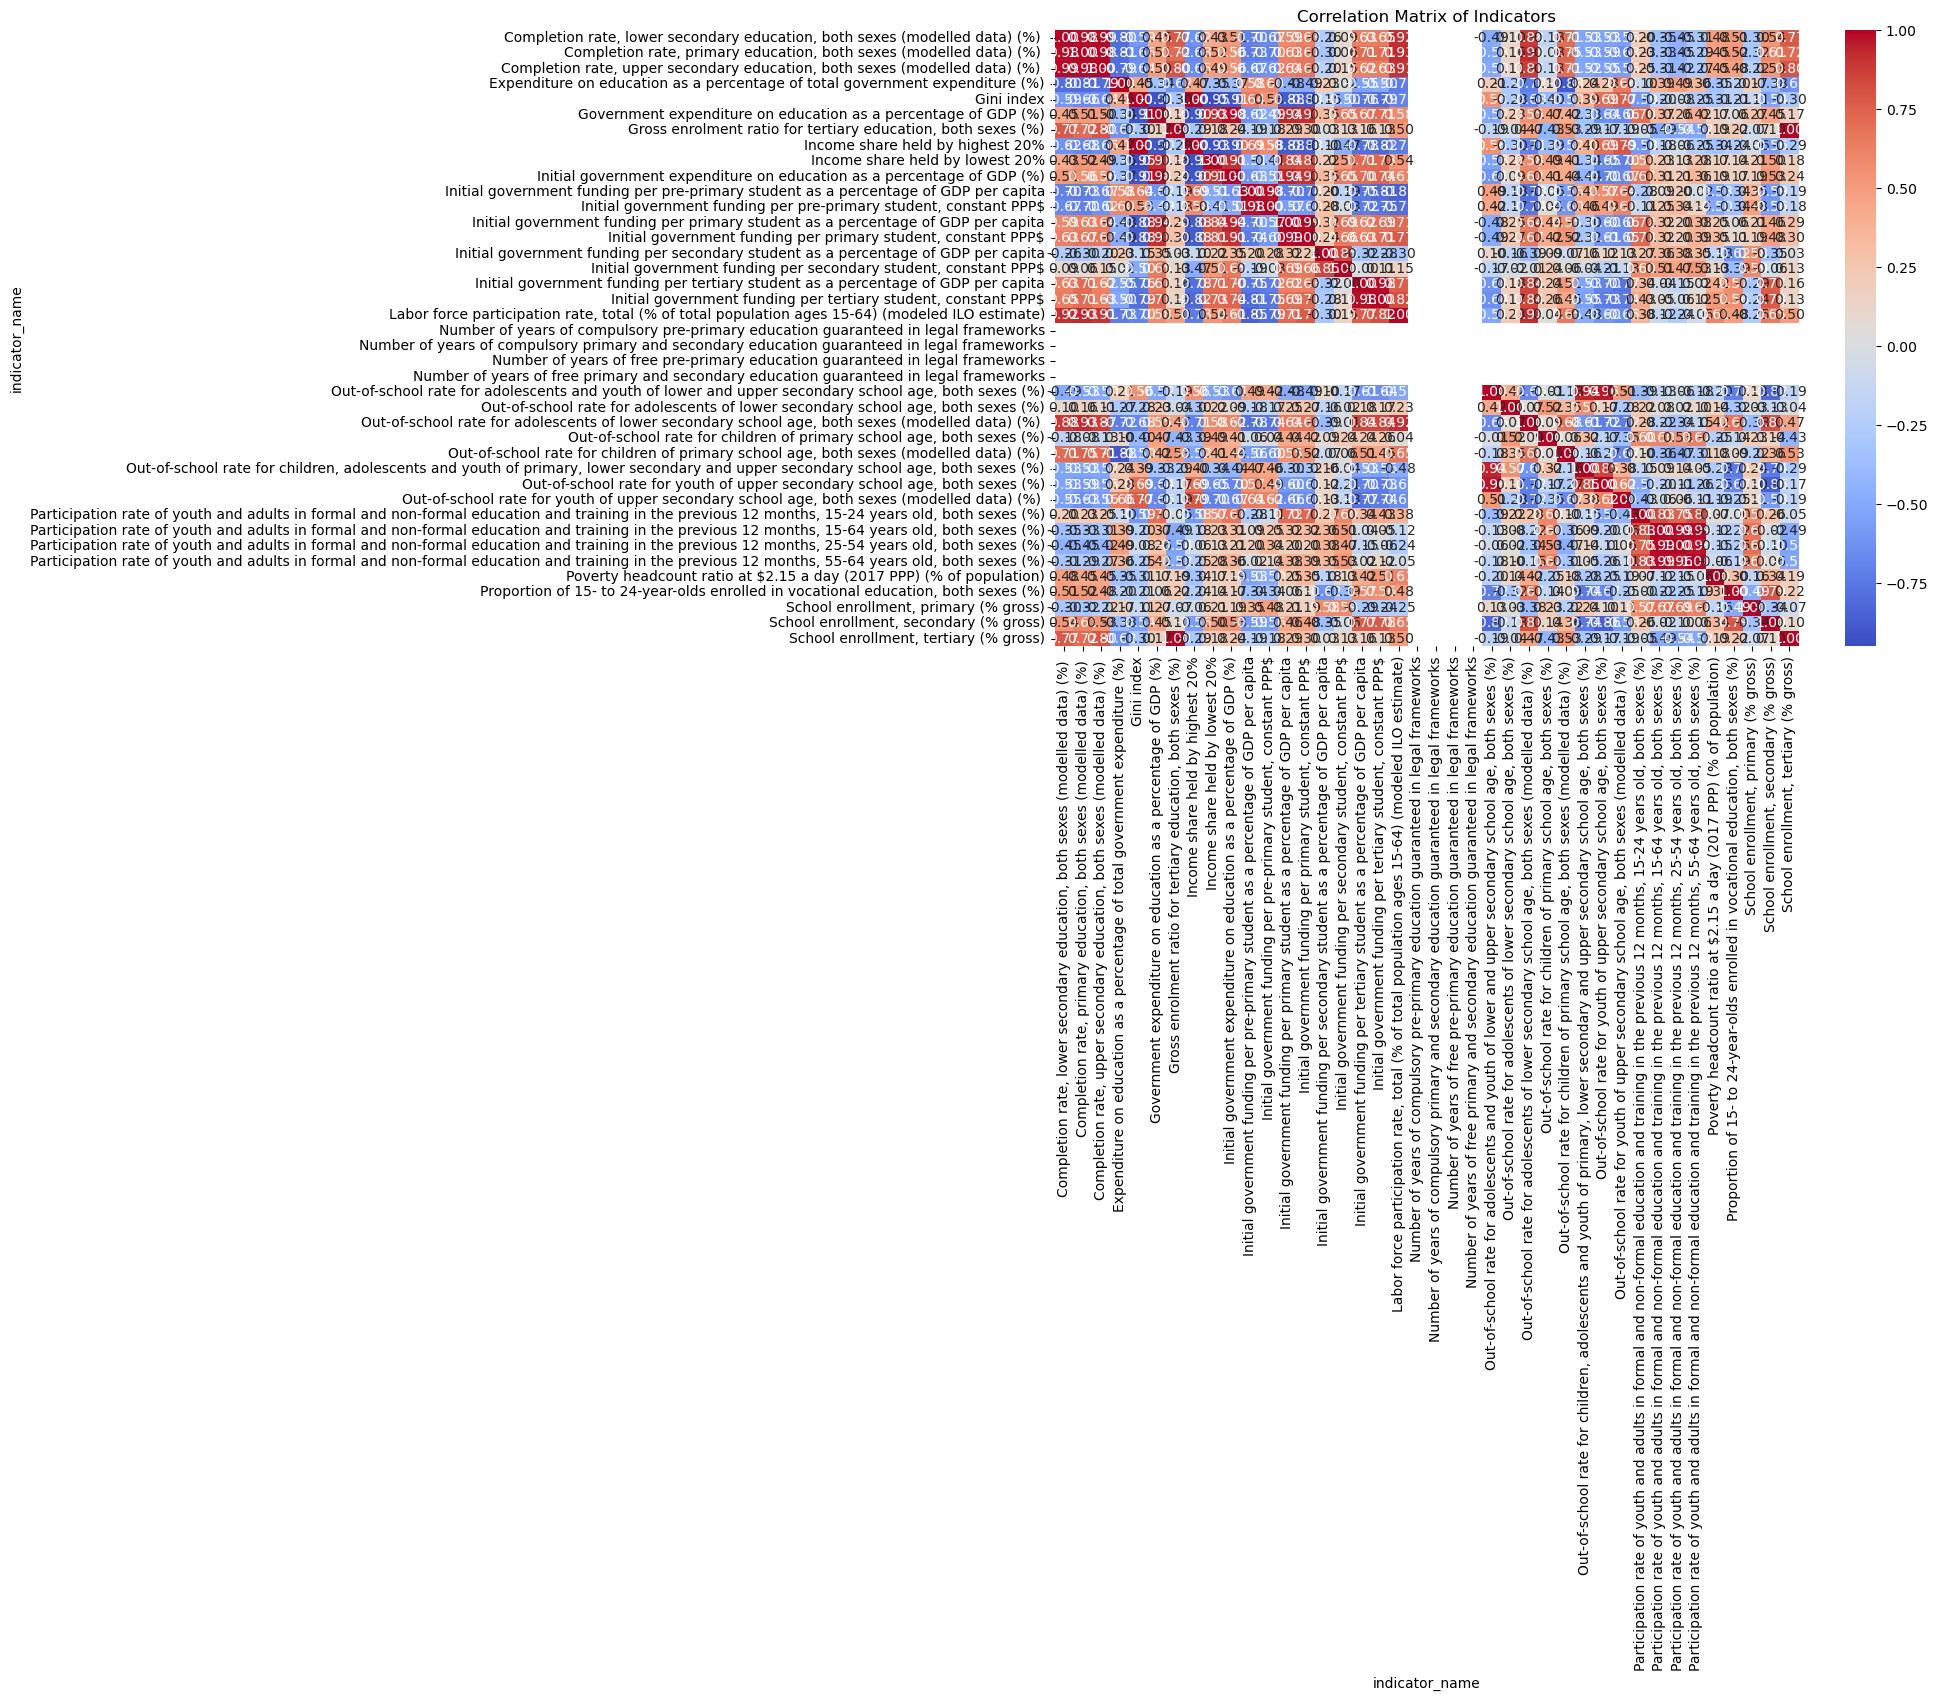

Strong Correlations:
indicator_name                                      Completion rate, lower secondary education, both sexes (modelled data) (%)   \
indicator_name                                                                                                                    
Completion rate, lower secondary education, bot...                                           1.000000                             
Completion rate, primary education, both sexes ...                                           0.984204                             
Completion rate, upper secondary education, bot...                                           0.991783                             
Expenditure on education as a percentage of tot...                                          -0.795077                             
Gini index                                                                                        NaN                             
Government expenditure on education as a percen...            

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Organize the Data
# Load the cleaned dataset
data_path = "C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv"  
data = pd.read_csv(data_path)

# Ensure the 'year' column is treated as datetime
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Step 2: Prepare Data for Correlation Analysis
# Pivot the data to create a wide format dataframe with indicators as columns
pivot_data = data.pivot(index='year', columns='indicator_name', values='value')

# Drop rows with missing values to ensure proper correlation calculations
pivot_data = pivot_data.dropna()

# Step 3: Compute Correlation Matrix
correlation_matrix = pivot_data.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Step 4: Visualize the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Indicators')
plt.show()

# Step 5: Insights from Correlation Analysis
# Identify strong positive or negative correlations (e.g., threshold > 0.7 or < -0.7)
strong_correlations = correlation_matrix[(correlation_matrix > 0.7) | (correlation_matrix < -0.7)]
print("Strong Correlations:")
print(strong_correlations)

# Specify a path to save the file
correlation_matrix.to_csv('C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/correlation_matrix.csv')



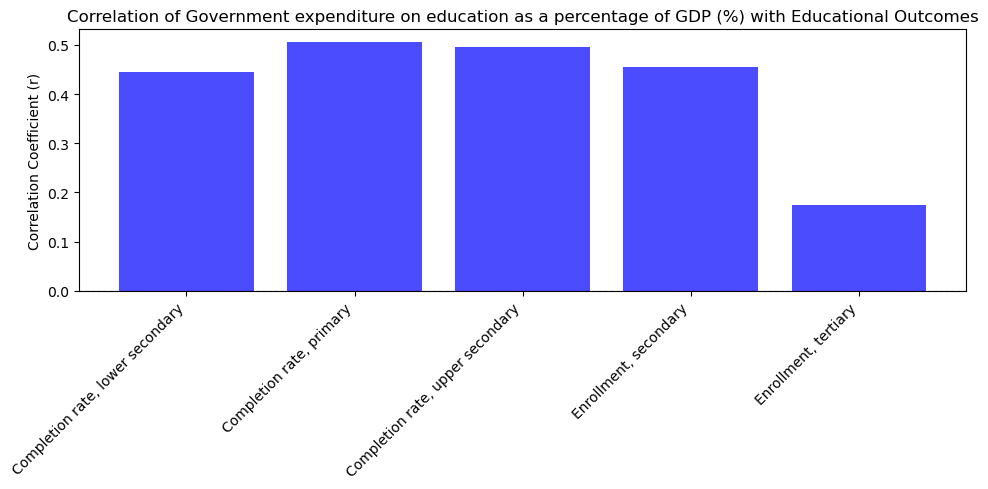

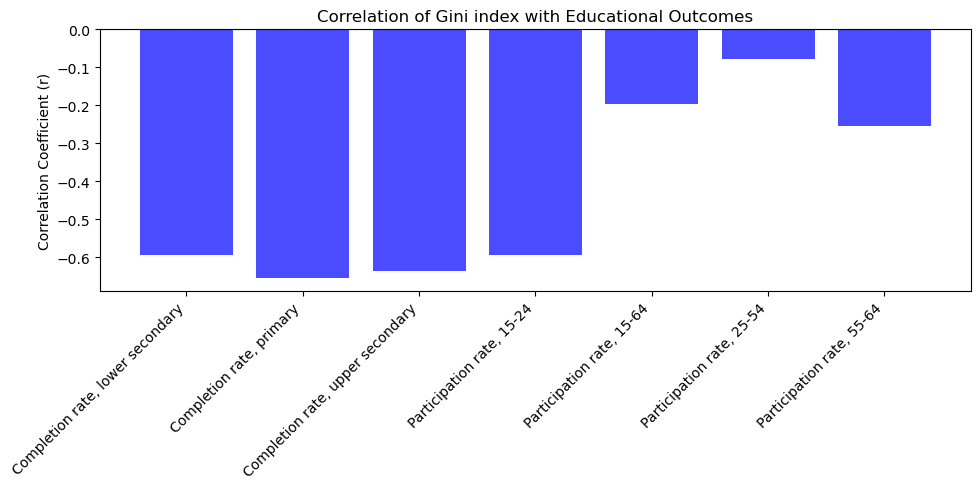

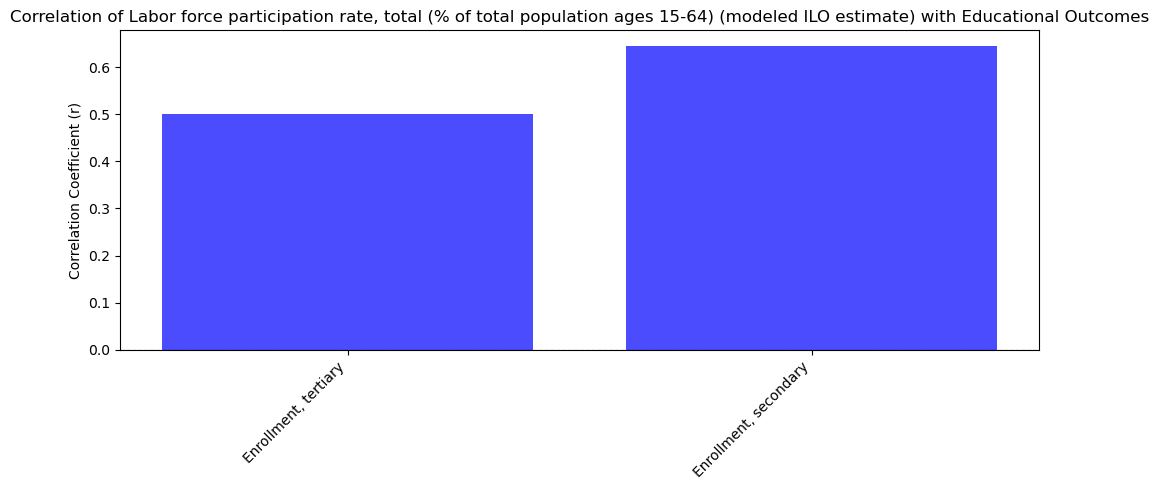

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the correlation matrix
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/correlation_matrix.csv'
correlation_matrix = pd.read_csv(file_path)

# Define the independent and dependent variables for each case
analysis_vars = {
    "Government expenditure on education as a percentage of GDP (%)": [
        "Completion rate, lower secondary education, both sexes (modelled data) (%) ",
        "Completion rate, primary education, both sexes (modelled data) (%) ",
        "Completion rate, upper secondary education, both sexes (modelled data) (%) ",
        "School enrollment, secondary (% gross)",
        "School enrollment, tertiary (% gross)"
    ],
    "Gini index": [
        "Completion rate, lower secondary education, both sexes (modelled data) (%) ",
        "Completion rate, primary education, both sexes (modelled data) (%) ",
        "Completion rate, upper secondary education, both sexes (modelled data) (%) ",
        "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-24 years old, both sexes (%)",
        "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-64 years old, both sexes (%)",
        "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 25-54 years old, both sexes (%)",
        "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 55-64 years old, both sexes (%)"
    ],
    "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)": [
        "School enrollment, tertiary (% gross)",
        "School enrollment, secondary (% gross)"
    ]
}

# Simplify the labels
label_mappings = {
    "Completion rate, lower secondary education, both sexes (modelled data) (%) ": "Completion rate, lower secondary",
    "Completion rate, primary education, both sexes (modelled data) (%) ": "Completion rate, primary",
    "Completion rate, upper secondary education, both sexes (modelled data) (%) ": "Completion rate, upper secondary",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-24 years old, both sexes (%)": "Participation rate, 15-24",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-64 years old, both sexes (%)": "Participation rate, 15-64",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 25-54 years old, both sexes (%)": "Participation rate, 25-54",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 55-64 years old, both sexes (%)": "Participation rate, 55-64",
    "School enrollment, secondary (% gross)": "Enrollment, secondary",
    "School enrollment, tertiary (% gross)": "Enrollment, tertiary"
}

# Extract correlations for each independent variable and its dependent variables
analysis_results = {}
for independent_var, dependent_vars in analysis_vars.items():
    correlations = correlation_matrix.loc[
        correlation_matrix['indicator_name'] == independent_var, dependent_vars
    ]
    analysis_results[independent_var] = correlations.T  

# Create separate bar charts with the simplified labels and legends showing full dependent variable names
for independent_var, correlations in analysis_results.items():
    dependent_vars = correlations.index
    values = correlations.values.flatten()

    # Simplify the labels for the x-axis using the label_mappings
    simplified_labels = [label_mappings[label] for label in dependent_vars]

    # Plot for this independent variable
    plt.figure(figsize=(10, 5))
    bars = plt.bar(simplified_labels, values, color='blue', alpha=0.7)
    plt.title(f"Correlation of {independent_var} with Educational Outcomes")
    plt.ylabel("Correlation Coefficient (r)")
    plt.xticks(rotation=45, ha="right")
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")

    plt.tight_layout()
    plt.show()


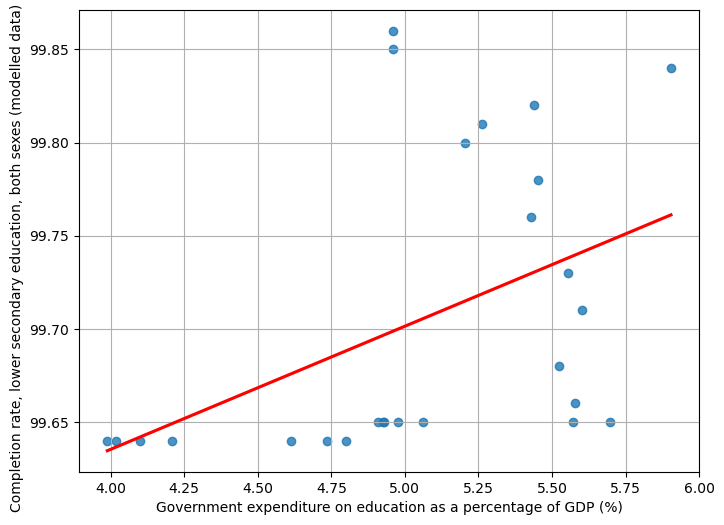

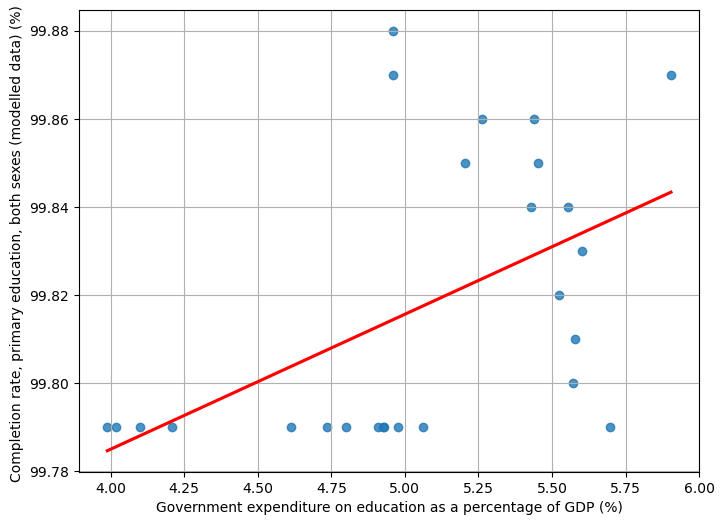

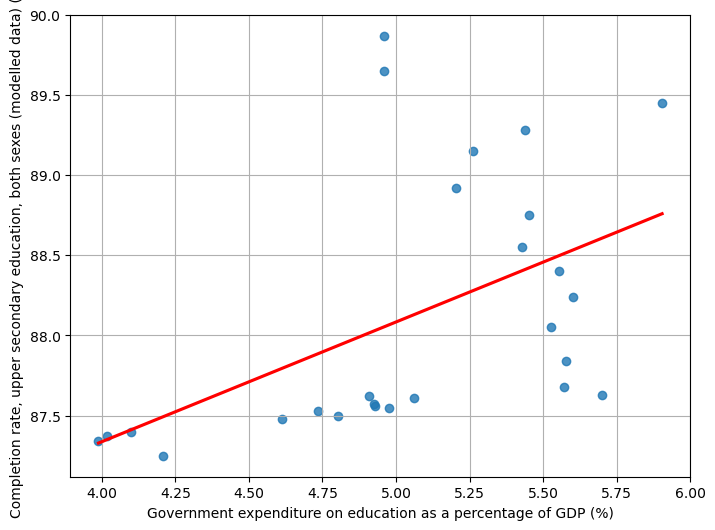

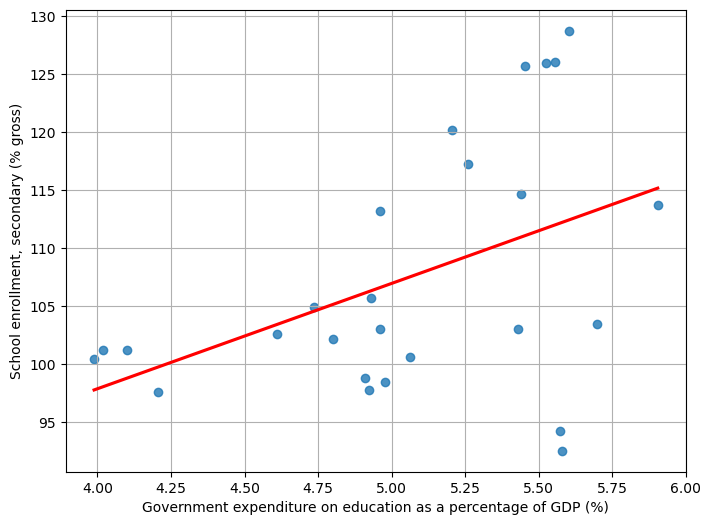

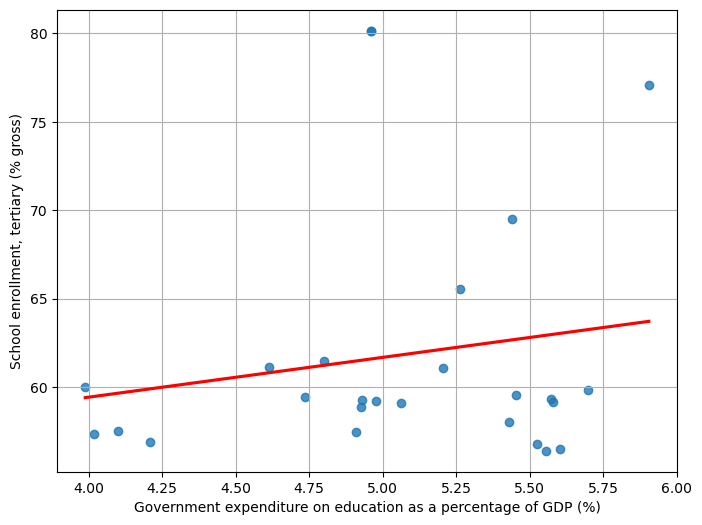

Regression Results for Completion rate, lower secondary education, both sexes (modelled data) (%) :

                                                         OLS Regression Results                                                        
Dep. Variable:     Completion rate, lower secondary education, both sexes (modelled data) (%)    R-squared:                       0.198
Model:                                                                                     OLS   Adj. R-squared:                  0.165
Method:                                                                          Least Squares   F-statistic:                     5.939
Date:                                                                         Mon, 16 Dec 2024   Prob (F-statistic):             0.0226
Time:                                                                                 00:47:00   Log-Likelihood:                 32.222
No. Observations:                                                                  

In [30]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'
dataset = pd.read_csv(file_path)

# Define the relevant indicators
independent_var = "Government expenditure on education as a percentage of GDP (%)"
dependent_vars = [
    "Completion rate, lower secondary education, both sexes (modelled data) (%) ",
    "Completion rate, primary education, both sexes (modelled data) (%) ",
    "Completion rate, upper secondary education, both sexes (modelled data) (%) ",
    "School enrollment, secondary (% gross)",
    "School enrollment, tertiary (% gross)"
]

# Filter the dataset for the relevant indicators
filtered_data = dataset[dataset['indicator_name'].isin([independent_var] + dependent_vars)]

# Pivot the data to have years as rows and indicators as columns
pivoted_data = filtered_data.pivot(index='year', columns='indicator_name', values='value').reset_index()

# Drop rows with missing values to ensure clean regression
pivoted_data = pivoted_data.dropna()

# Define the independent variable (predictor) and dependent variables (outcomes)
X = pivoted_data[independent_var]
Y = pivoted_data[dependent_vars]

# Add a constant term to the predictor for the regression model
X_with_const = sm.add_constant(X)

# Fit the multiple regression model for each dependent variable and collect summaries
results = {}
for dependent_var in dependent_vars:
    model = sm.OLS(Y[dependent_var], X_with_const).fit()
    results[dependent_var] = model

    # Plotting
    plt.figure(figsize=(8, 6))
    
    # Scatter plot with regression line
    sns.regplot(x=X, y=Y[dependent_var], ci=None, line_kws={"color": "red"})
    plt.xlabel(independent_var)
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.show()
    


# Display regression summaries
for dependent_var, model in results.items():
    print(f"Regression Results for {dependent_var}:\n")
    print(model.summary())
    print("\n")


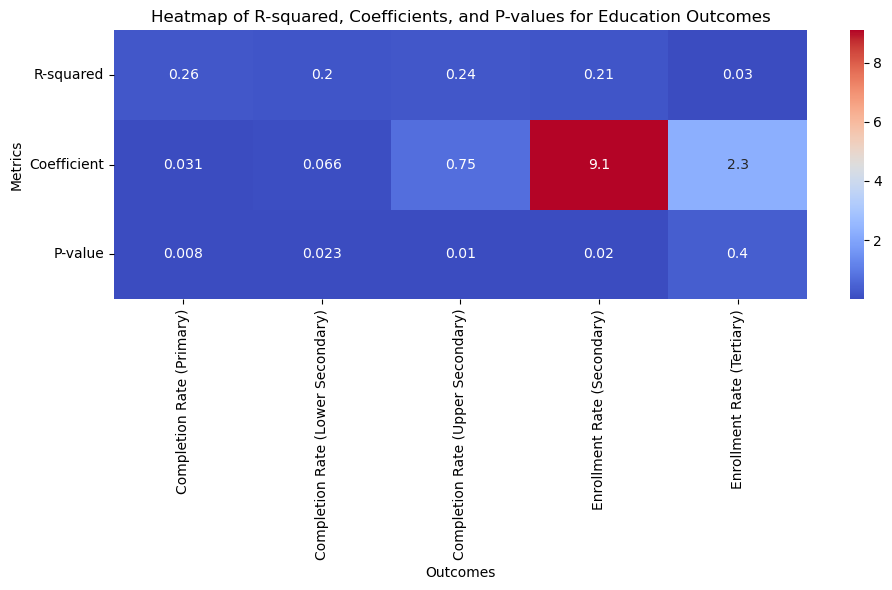

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Creating the dataframe from the given table data
data = {
    'Outcome': ['Completion Rate (Primary)', 'Completion Rate (Lower Secondary)', 'Completion Rate (Upper Secondary)', 'Enrollment Rate (Secondary)', 'Enrollment Rate (Tertiary)'],
    'R-squared': [0.256, 0.198, 0.245, 0.207, 0.030],
    'Coefficient': [0.0306, 0.0660, 0.7466, 9.0904, 2.2519],
    'P-value': [0.008, 0.023, 0.010, 0.020, 0.397]
}

df = pd.DataFrame(data)

# Setting up a seaborn heatmap to visualize the R-squared, Coefficients, and P-values
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a heatmap to compare all metrics across outcomes
sns.heatmap(df[['R-squared', 'Coefficient', 'P-value']].T, annot=True, cmap='coolwarm', cbar=True, xticklabels=df['Outcome'], yticklabels=['R-squared', 'Coefficient', 'P-value'], ax=ax)

# Rotating the y-axis labels to horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Adding titles and labels
ax.set_title('Heatmap of R-squared, Coefficients, and P-values for Education Outcomes')
ax.set_xlabel('Outcomes')
ax.set_ylabel('Metrics')

plt.tight_layout()
plt.show()


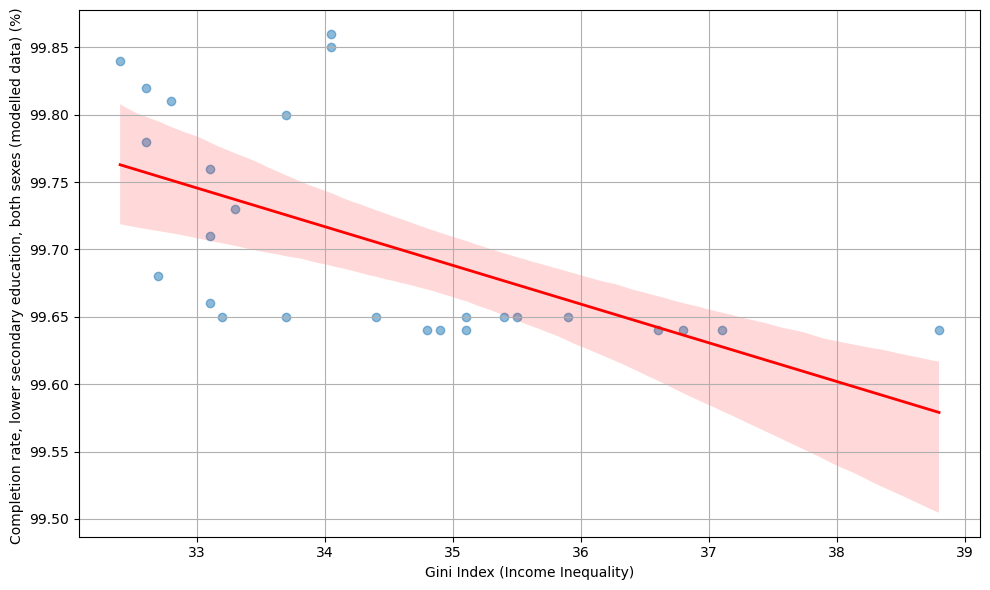

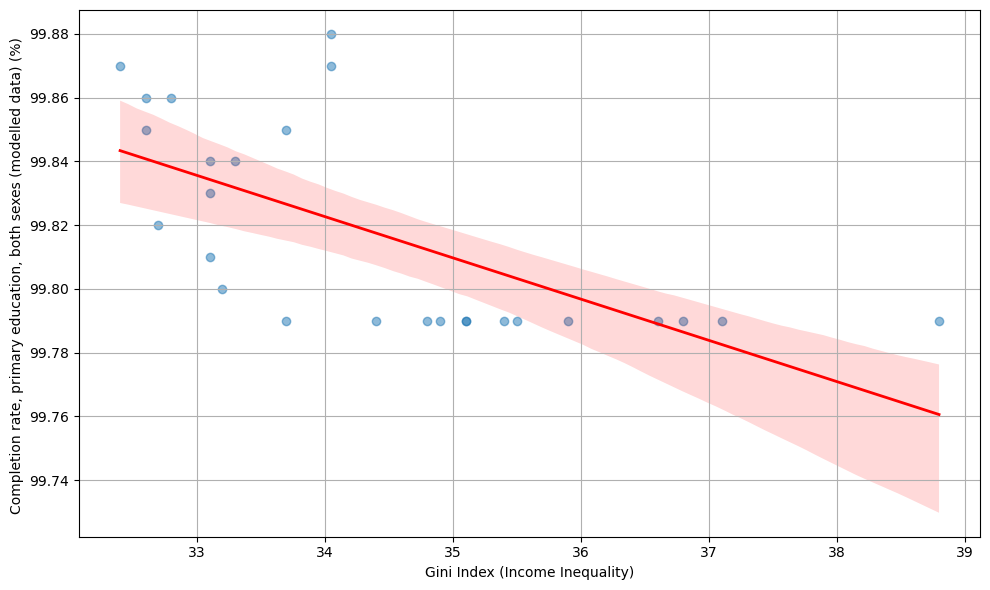

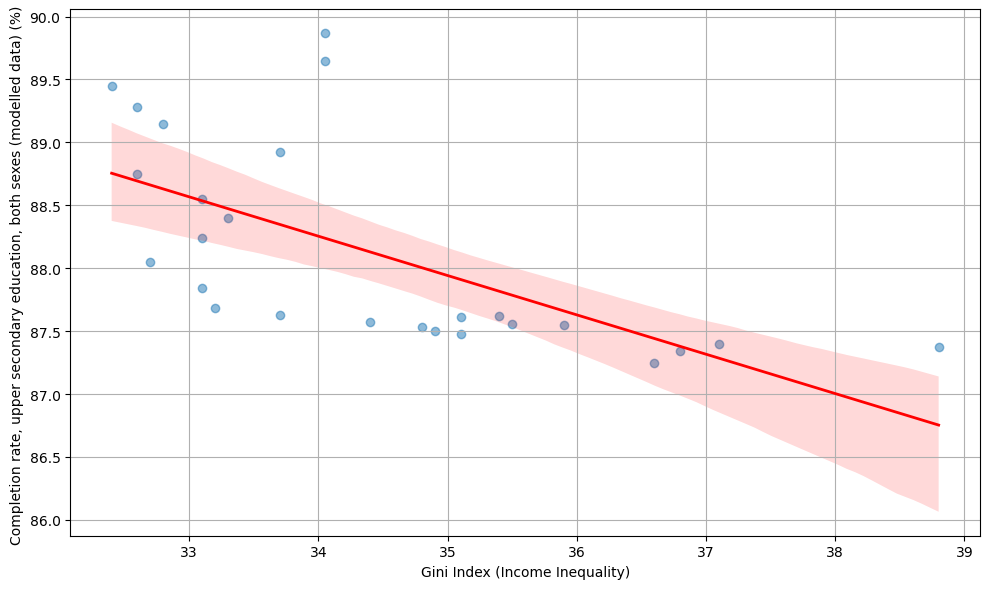

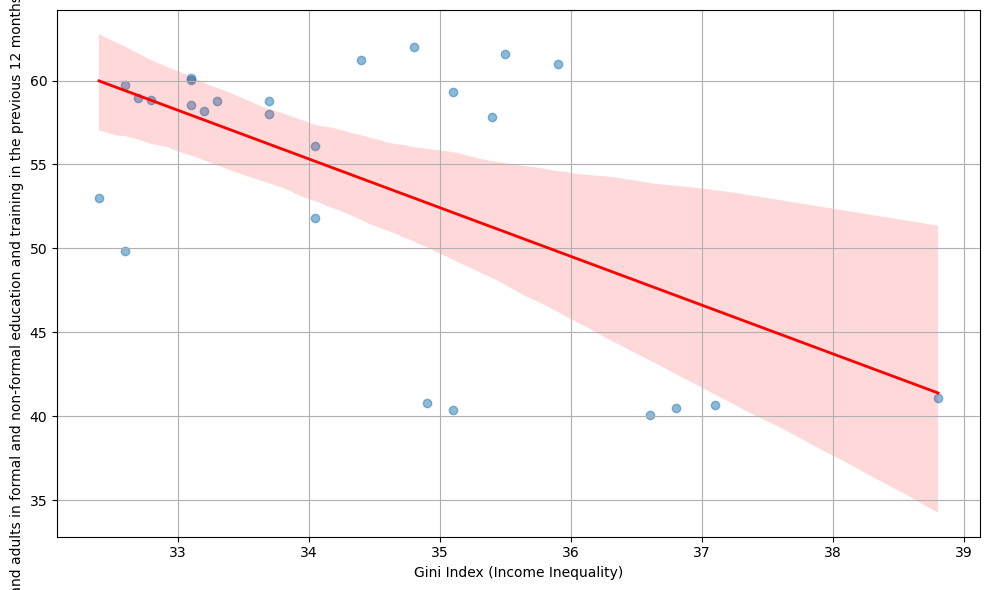

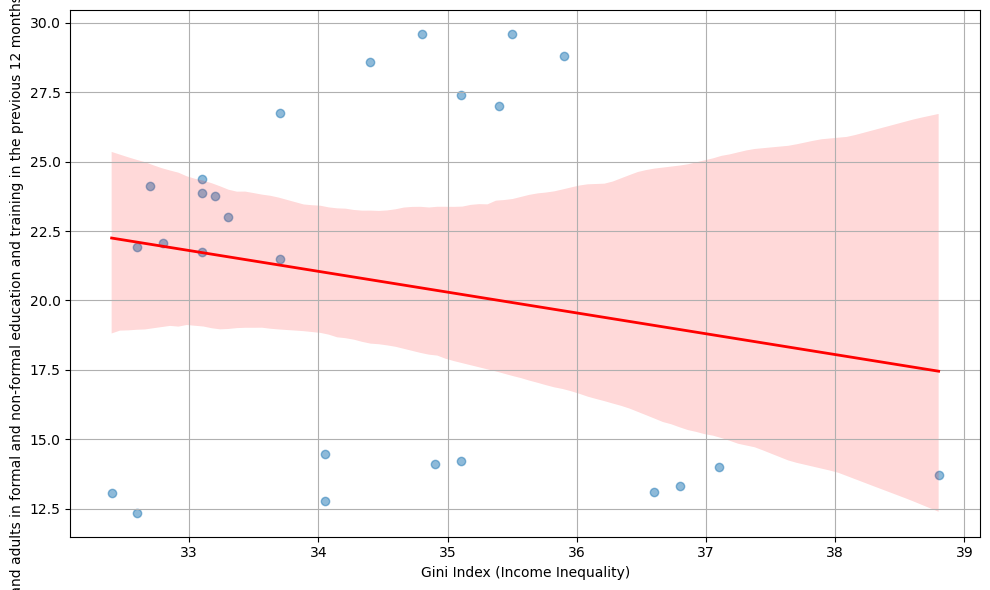

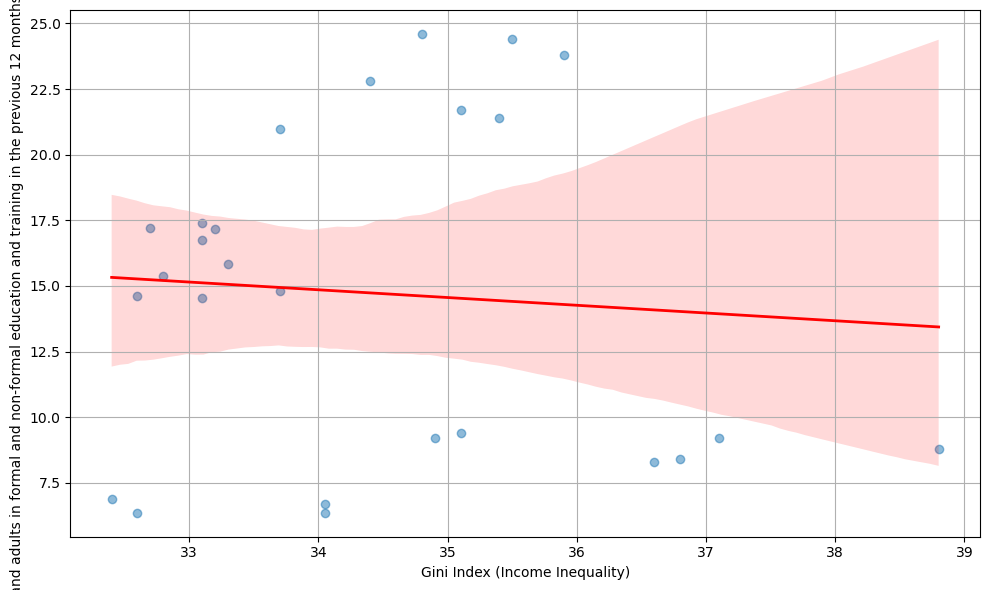

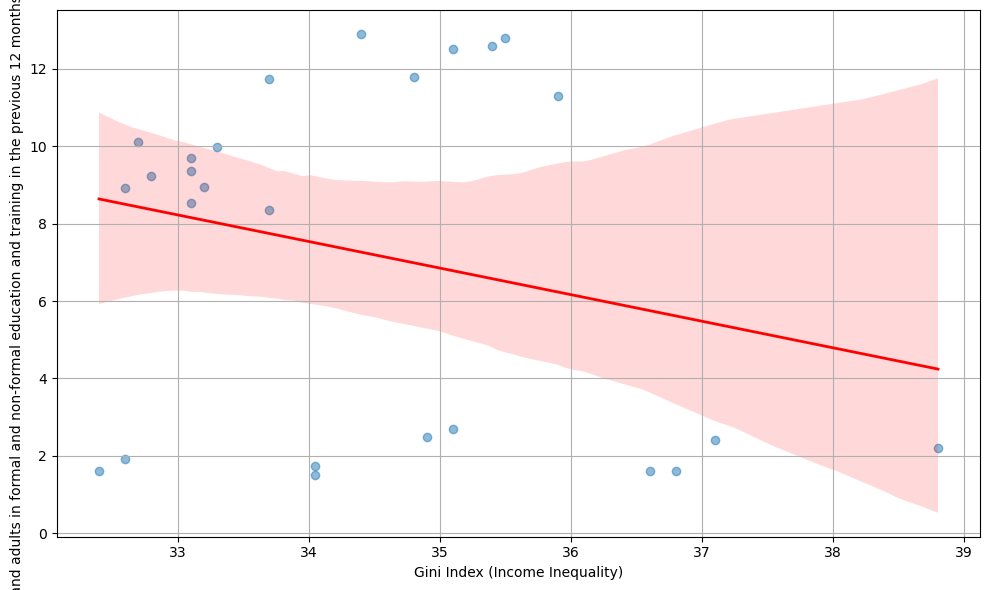

Regression Results for Completion rate, lower secondary education, both sexes (modelled data) (%) :

                                                         OLS Regression Results                                                        
Dep. Variable:     Completion rate, lower secondary education, both sexes (modelled data) (%)    R-squared:                       0.352
Model:                                                                                     OLS   Adj. R-squared:                  0.325
Method:                                                                          Least Squares   F-statistic:                     13.05
Date:                                                                         Mon, 16 Dec 2024   Prob (F-statistic):            0.00139
Time:                                                                                 00:47:00   Log-Likelihood:                 34.992
No. Observations:                                                                  

In [32]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv' 
dataset = pd.read_csv(file_path)

# Define the relevant variables
independent_var = "Gini index"
dependent_vars = [
    "Completion rate, lower secondary education, both sexes (modelled data) (%) ",
    "Completion rate, primary education, both sexes (modelled data) (%) ",
    "Completion rate, upper secondary education, both sexes (modelled data) (%) ",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-24 years old, both sexes (%)",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 15-64 years old, both sexes (%)",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 25-54 years old, both sexes (%)",
    "Participation rate of youth and adults in formal and non-formal education and training in the previous 12 months, 55-64 years old, both sexes (%)"
]

# Filter the dataset for the relevant variables
filtered_data = dataset[dataset['indicator_name'].isin([independent_var] + dependent_vars)]

# Pivot the data to align years as rows and indicators as columns
pivoted_data = filtered_data.pivot(index='year', columns='indicator_name', values='value').reset_index()

# Drop rows with missing values for clean regression analysis
cleaned_data = pivoted_data.dropna()

# Perform regression analysis and generate scatter plots
regression_results = {}
for dependent_var in dependent_vars:
    # Fit the regression model
    X = sm.add_constant(cleaned_data[independent_var])  
    Y = cleaned_data[dependent_var]
    model = sm.OLS(Y, X).fit()
    regression_results[dependent_var] = model.summary()

    # Generate scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=cleaned_data[independent_var],
        y=Y,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red", "lw": 2}
    )
    plt.xlabel("Gini Index (Income Inequality)")
    plt.ylabel(dependent_var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Display regression summaries
for dependent_var, summary in regression_results.items():
    print(f"Regression Results for {dependent_var}:\n")
    print(summary)
    print("\n")


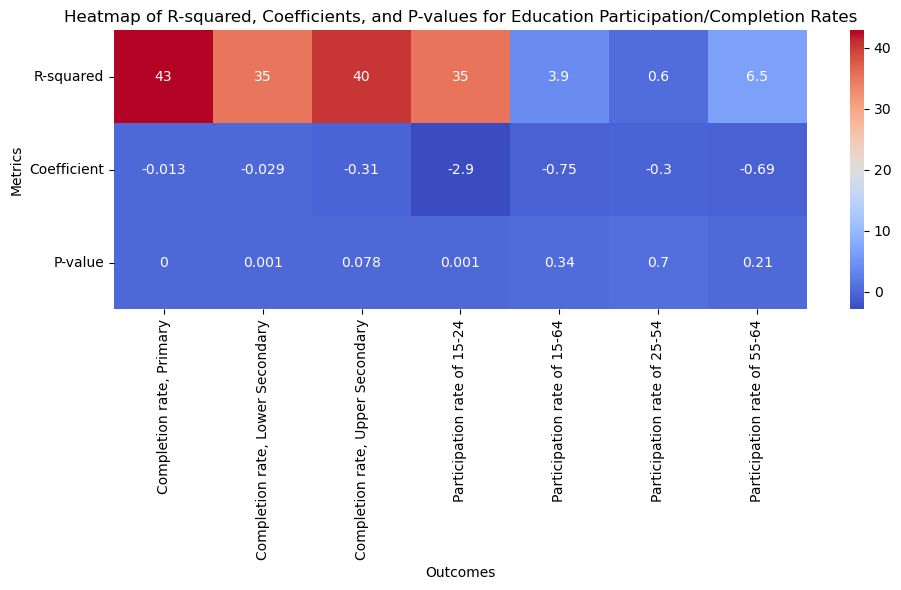

In [33]:
# Creating the new dataframe from the second table data
data2 = {
    'Outcome': [
        'Completion rate, Primary', 
        'Completion rate, Lower Secondary', 
        'Completion rate, Upper Secondary', 
        'Participation rate of 15-24', 
        'Participation rate of 15-64', 
        'Participation rate of 25-54', 
        'Participation rate of 55-64'
    ],
    'R-squared': [42.9, 35.2, 40.4, 35.3, 3.9, 0.6, 6.5],
    'Coefficient': [-0.0129, -0.0287, -0.3128, -2.9049, -0.7496, -0.2951, -0.6867],
    'P-value': [0.000, 0.001, 0.078, 0.001, 0.335, 0.704, 0.209]
}

df2 = pd.DataFrame(data2)

# Creating the heatmap for the second dataset
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a heatmap for R-squared, Coefficients, and P-values
sns.heatmap(df2[['R-squared', 'Coefficient', 'P-value']].T, annot=True, cmap='coolwarm', cbar=True, xticklabels=df2['Outcome'], yticklabels=['R-squared', 'Coefficient', 'P-value'], ax=ax)

# Rotating y-axis labels to horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Adding titles and labels
ax.set_title('Heatmap of R-squared, Coefficients, and P-values for Education Participation/Completion Rates')
ax.set_xlabel('Outcomes')
ax.set_ylabel('Metrics')

plt.tight_layout()
plt.show()


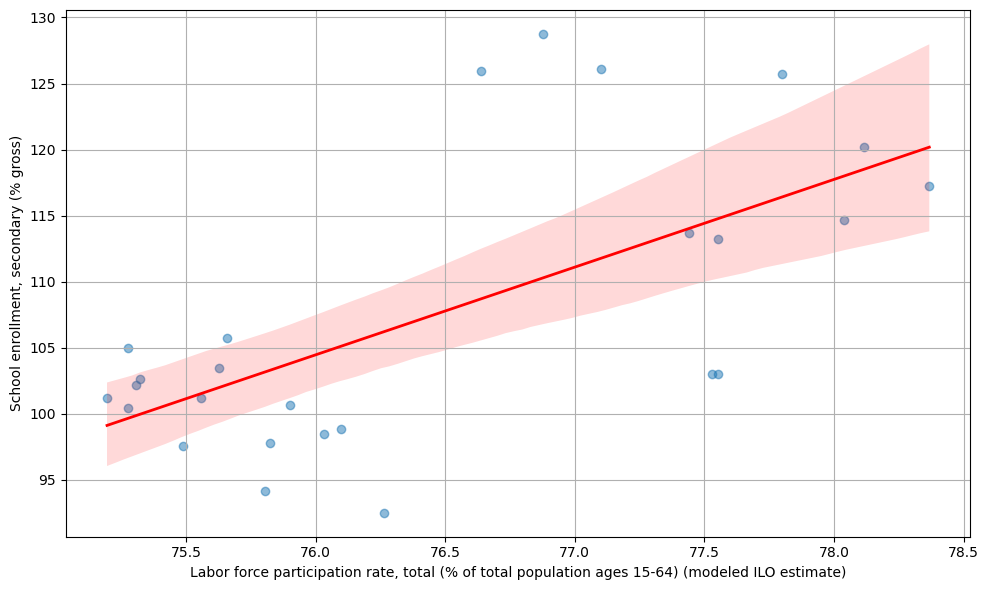

Regression results for School enrollment, secondary (% gross):
                                      OLS Regression Results                                      
Dep. Variable:     School enrollment, secondary (% gross)   R-squared:                       0.417
Model:                                                OLS   Adj. R-squared:                  0.393
Method:                                     Least Squares   F-statistic:                     17.16
Date:                                    Mon, 16 Dec 2024   Prob (F-statistic):           0.000367
Time:                                            00:47:01   Log-Likelihood:                -91.151
No. Observations:                                      26   AIC:                             186.3
Df Residuals:                                          24   BIC:                             188.8
Df Model:                                               1                                         
Covariance Type:                              

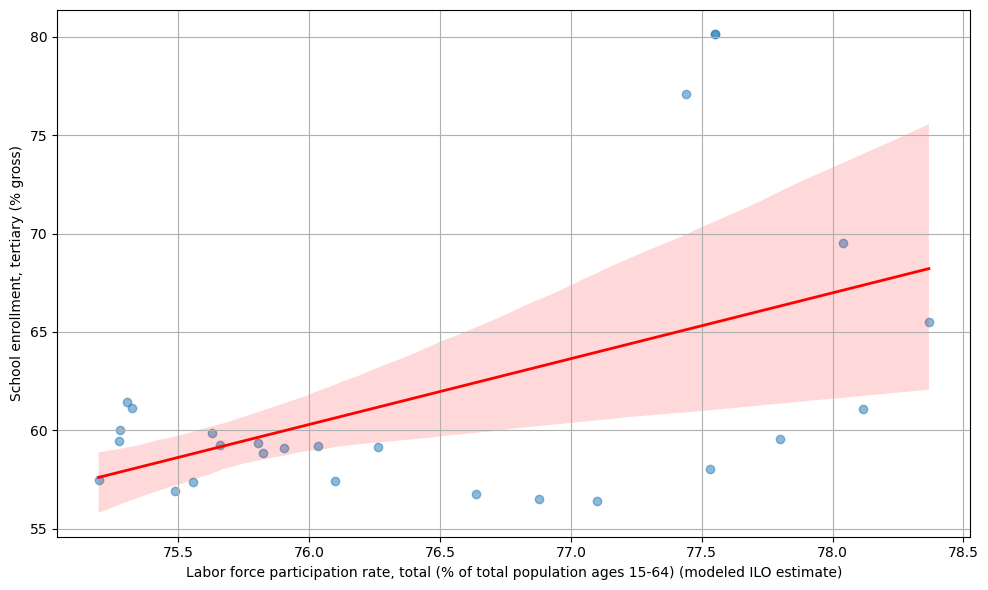

Regression results for School enrollment, tertiary (% gross):
                                      OLS Regression Results                                     
Dep. Variable:     School enrollment, tertiary (% gross)   R-squared:                       0.251
Model:                                               OLS   Adj. R-squared:                  0.220
Method:                                    Least Squares   F-statistic:                     8.059
Date:                                   Mon, 16 Dec 2024   Prob (F-statistic):            0.00907
Time:                                           00:47:01   Log-Likelihood:                -83.155
No. Observations:                                     26   AIC:                             170.3
Df Residuals:                                         24   BIC:                             172.8
Df Model:                                              1                                         
Covariance Type:                               nonrobust

In [34]:
# Import necessary libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/User/OneDrive - University of Exeter/PostGradute/Topic in business analytics/Mini Project/global education policies impact social equity and economic mobility across countries/Cleaned_Dataset_Final.csv'  # Update the path to your file
dataset = pd.read_csv(file_path)

# Define the independent and dependent variables for the analysis
independent_var = "Labor force participation rate, total (% of total population ages 15-64) (modeled ILO estimate)"
dependent_vars = [
    "School enrollment, secondary (% gross)",
    "School enrollment, tertiary (% gross)"
]

# Filter the dataset to include the relevant variables
filtered_data = dataset[dataset['indicator_name'].isin([independent_var] + dependent_vars)]

# Pivot the data to align years as rows and indicators as columns
pivoted_data = filtered_data.pivot(index='year', columns='indicator_name', values='value').reset_index()

# Drop rows with missing values to ensure clean regression analysis
cleaned_data = pivoted_data.dropna()

# Perform regression analysis for each dependent variable
for dep_var in dependent_vars:
    # Define the independent and dependent variables for the regression
    X = sm.add_constant(cleaned_data[independent_var])  
    Y = cleaned_data[dep_var]
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()

    # Generate scatter plot with regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(
        x=cleaned_data[independent_var],
        y=Y,
        scatter_kws={"alpha": 0.5},
        line_kws={"color": "red", "lw": 2}
    )
    plt.xlabel(independent_var)
    plt.ylabel(dep_var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Display the regression summary
    print(f"Regression results for {dep_var}:")
    print(model.summary())
    print("\n" + "="*80 + "\n")


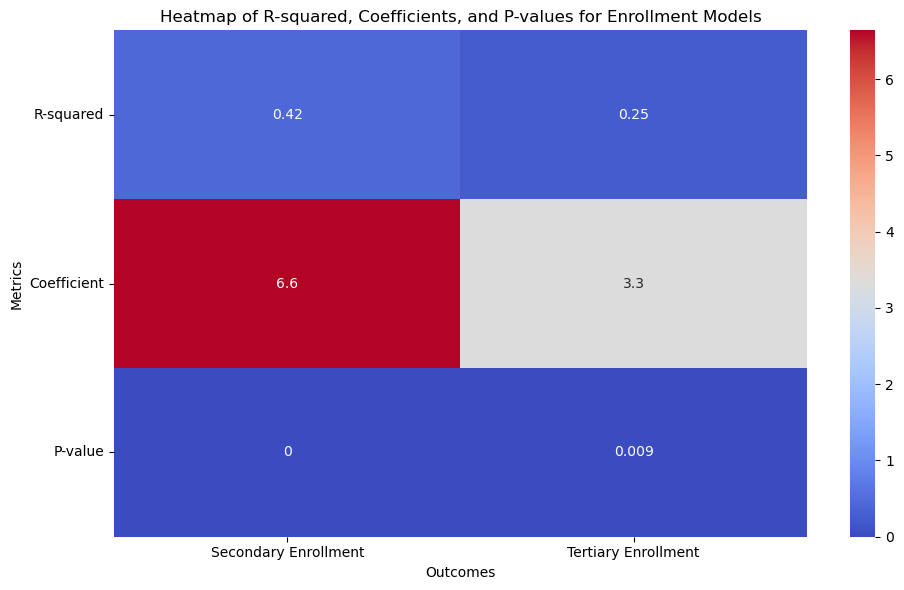

In [35]:
# Creating the dataframe for the new table data
data3 = {
    'Outcome': ['Secondary Enrollment', 'Tertiary Enrollment'],
    'R-squared': [0.417, 0.251],
    'Adjusted R-squared': [0.393, 0.220],
    'Coefficient': [6.6393, 3.3453],
    'P-value': [0.000, 0.009],
    'F-statistic': [17.16, 8.059],
    'Intercept': [-400.13, -193.94],
    'Observations': [26, 26],
    'Model Fit': ['Stronger', 'Moderate']
}

df3 = pd.DataFrame(data3)

# Creating the heatmap for this dataset
fig, ax = plt.subplots(figsize=(10, 6))

# Creating a heatmap for R-squared, Coefficients, and P-values
sns.heatmap(df3[['R-squared', 'Coefficient', 'P-value']].T, annot=True, cmap='coolwarm', cbar=True, xticklabels=df3['Outcome'], yticklabels=['R-squared', 'Coefficient', 'P-value'], ax=ax)

# Rotating y-axis labels to horizontal
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Adding titles and labels
ax.set_title('Heatmap of R-squared, Coefficients, and P-values for Enrollment Models')
ax.set_xlabel('Outcomes')
ax.set_ylabel('Metrics')

plt.tight_layout()
plt.show()
